### **Data Preprocessing**

In [8]:
import pandas as pd

In [9]:
df_tintin = pd.read_csv('tintin.csv')

In [10]:
# Copy df_tintin
df_tintin_copy = df_tintin.copy()

# Save the processed DataFrame to a new CSV file
df_tintin_completed = pd.read_csv('tintin_completed.csv')

In [11]:
# Define the categorical column to calculate
categorical_column = 'RegionSimplified'

# Calculate the number of unique 'Document Name' in each category of 'RegionSimplified'
unique_counts = df_tintin_completed.groupby(categorical_column)['Document Name'].nunique()
print(f"\nUnique Document Name Counts for {categorical_column}:")
print(unique_counts)

# Check for missing values in the 'RegionSimplified' column
missing_values = df_tintin_completed[categorical_column].isnull().sum()
print(f"Missing values in {categorical_column}: {missing_values}")


Unique Document Name Counts for RegionSimplified:
RegionSimplified
Africa               144
East Asia             68
Europe               170
North America         36
Oceania               17
South America         91
SouthCentral Asia     52
West Asia             55
Name: Document Name, dtype: int64
Missing values in RegionSimplified: 0


In [12]:
# Create a copy of the 'RegionSimplified' column
df_region = df_tintin_completed.copy()

# Remove rows with 'Oceania' and 'North America' categories
df_region = df_region[~df_region['RegionSimplified'].isin(['Oceania', 'North America'])]

# Count the number of unique 'Document Name' for each 'RegionSimplified' category after processing
comics_number_region = df_region.groupby('RegionSimplified')['Document Name'].nunique()
print("\nComics Number for RegionSimplified after processing:")
print(comics_number_region)


Comics Number for RegionSimplified after processing:
RegionSimplified
Africa               144
East Asia             68
Europe               170
South America         91
SouthCentral Asia     52
West Asia             55
Name: Document Name, dtype: int64


In [11]:
print(df_region.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37301 entries, 0 to 40825
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             37301 non-null  int64  
 1   Project Name           37301 non-null  object 
 2   Document Name          37301 non-null  object 
 3   Global Region          37301 non-null  object 
 4   RegionSimplified       37301 non-null  object 
 5   Country                37301 non-null  object 
 6   Document Name.1        37301 non-null  object 
 7   Publication Date       37301 non-null  int64  
 8   Publisher              33343 non-null  object 
 9   Format                 37301 non-null  object 
 10  CountryLang            37301 non-null  object 
 11  LanguageFinal          37301 non-null  object 
 12  Silent?                8639 non-null   object 
 13  Genre Simplified       36226 non-null  object 
 14  StyleDetail            37301 non-null  object 
 15  St

In [15]:
# Rename the '2.5.1 Panel Emotions' column to 'Annotator' in df_region
df_region.rename(columns={'2.5.1 Panel Emotions': 'Annotator'}, inplace=True)

# Display the modified DataFrame to confirm the change
print(df_region.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37301 entries, 0 to 40825
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             37301 non-null  int64  
 1   Project Name           37301 non-null  object 
 2   Document Name          37301 non-null  object 
 3   Global Region          37301 non-null  object 
 4   RegionSimplified       37301 non-null  object 
 5   Country                37301 non-null  object 
 6   Document Name.1        37301 non-null  object 
 7   Publication Date       37301 non-null  int64  
 8   Publisher              33343 non-null  object 
 9   Format                 37301 non-null  object 
 10  CountryLang            37301 non-null  object 
 11  LanguageFinal          37301 non-null  object 
 12  Silent?                8639 non-null   object 
 13  Genre Simplified       36226 non-null  object 
 14  StyleDetail            37301 non-null  object 
 15  St

In [17]:
pip install statsmodels # Install the statsmodels library

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Import libraries for data visualization and statistical modeling.
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 

In [19]:
# Create a copy of the df_region DataFrame
df_region_copy = df_region.copy()

# Reduce 'Document Name' counts by 5 for 'Manga' and 5 for 'RealExaggerated'
style_reductions = {'Manga': 5, 'RealExaggerated': 6}

for style, reduction_count in style_reductions.items():
    # Get unique 'Document Name' for the specific style
    unique_documents = df_region_copy[df_region_copy['StyleBroad'] == style]['Document Name'].unique()
    # Randomly select reduction_count number of unique 'Document Name'
    documents_to_drop = pd.Series(unique_documents).sample(reduction_count).tolist()
    # Drop rows corresponding to these 'Document Name'
    df_region_copy = df_region_copy[~df_region_copy['Document Name'].isin(documents_to_drop)]

columns_to_check = ['StyleBroad']  #

# Print the unique Document Name distribution for each style within each region
for region in df_region_copy['RegionSimplified'].unique():
    print(f"Unique Document Name Distribution for Region: {region}")
    sub_df = df_region_copy[df_region_copy['RegionSimplified'] == region]

    for column in columns_to_check:
        unique_document_counts = sub_df.groupby(column)['Document Name'].nunique()
        total_unique_documents = unique_document_counts.sum()
        subcategory_percentages = (unique_document_counts / total_unique_documents * 100).round(2)
        subcategory_combined = unique_document_counts.astype(str) + " (" + subcategory_percentages.astype(str) + "%)"
        print(f"{column} Distribution and Percentages:")
        print(subcategory_combined)

    print("\n" + "=" * 50 + "\n\n")


Unique Document Name Distribution for Region: Africa
StyleBroad Distribution and Percentages:
StyleBroad
Cartoony           36 (25.53%)
Manga              28 (19.86%)
RealExaggerated    71 (50.35%)
Realistic            6 (4.26%)
Name: Document Name, dtype: object



Unique Document Name Distribution for Region: SouthCentral Asia
StyleBroad Distribution and Percentages:
StyleBroad
Cartoony           16 (31.37%)
Manga              11 (21.57%)
RealExaggerated    20 (39.22%)
Realistic            4 (7.84%)
Name: Document Name, dtype: object



Unique Document Name Distribution for Region: East Asia
StyleBroad Distribution and Percentages:
StyleBroad
Cartoony             6 (8.96%)
Manga              36 (53.73%)
RealExaggerated     13 (19.4%)
Realistic          12 (17.91%)
Name: Document Name, dtype: object



Unique Document Name Distribution for Region: Europe
StyleBroad Distribution and Percentages:
StyleBroad
Alternative        24 (14.29%)
Cartoony           25 (14.88%)
Manga             

In [20]:
# Define the sample size for each region
region_sample_sizes = {
    'Africa': 65,
    'East Asia': 65,
    'Europe': 65,
    'South America': 65,
    'SouthCentral Asia': 50,
    'West Asia': 50
}

# Initialize an empty DataFrame to store the sampled results
df_region_sample = pd.DataFrame()

# Perform random sampling for each region
for region, sample_size in region_sample_sizes.items():
    # Get the sub DataFrame for the current region
    sub_df = df_region_copy[df_region_copy['RegionSimplified'] == region]
    
    # Get unique Document Names after removing duplicates
    unique_documents = sub_df.drop_duplicates(subset=['Document Name'])
    
    # Adjust the sample size if the actual number of unique Document Names is less than required
    if len(unique_documents) < sample_size:
        print(f"Warning: The number of unique Document Names in region {region} is less than the required sample size of {sample_size}. Actual number: {len(unique_documents)}")
        sample_size = len(unique_documents)
    
    # Randomly sample unique Document Names
    sampled_documents = unique_documents.sample(n=sample_size, random_state=1, replace=False)
    
    # Append the sampled results to the result DataFrame
    df_region_sample = pd.concat([df_region_sample, sub_df[sub_df['Document Name'].isin(sampled_documents['Document Name'])]])

In [21]:
import pandas as pd

# Define the columns to check
columns_to_check = ['Genre Simplified', 'StyleBroad', 'Annotator', 'Audience','LanguageFinal']

# Print the unique Document Name distribution for each region
for region in df_region_sample['RegionSimplified'].unique():
    print(f"Unique Document Name Distribution for Region: {region}")
    print("=" * 50)
    sub_df = df_region_sample[df_region_sample['RegionSimplified']== region]

    for column in columns_to_check:
        # Calculate the number of unique Document Names for each subcategory
        unique_document_counts = sub_df.groupby(column)['Document Name'].nunique()
        total_unique_documents = unique_document_counts.sum()

        # Calculate the percentage for each subcategory
        subcategory_percentages = (unique_document_counts / total_unique_documents * 100).round(2)

        # Combine unique counts and percentages
        subcategory_combined = unique_document_counts.astype(str) + " (" + subcategory_percentages.astype(str) + "%)"
        print(f"{column} Distribution and Percentages:")
        print(subcategory_combined)
        print("\n")

    print("\n" + "=" * 50 + "\n\n")

Unique Document Name Distribution for Region: Africa
Genre Simplified Distribution and Percentages:
Genre Simplified
Action Adventure          2 (3.45%)
Drama                   15 (25.86%)
Fantasy                  9 (15.52%)
Historical adventure      1 (1.72%)
Horror                     4 (6.9%)
Political               14 (24.14%)
Science fiction           3 (5.17%)
Superhero                9 (15.52%)
Supernatural              1 (1.72%)
Name: Document Name, dtype: object


StyleBroad Distribution and Percentages:
StyleBroad
Cartoony            13 (20.0%)
Manga              14 (21.54%)
RealExaggerated    35 (53.85%)
Realistic            3 (4.62%)
Name: Document Name, dtype: object


Annotator Distribution and Percentages:
Annotator
JB    12 (22.64%)
JW    13 (24.53%)
LZ    14 (26.42%)
SD      4 (7.55%)
XZ    10 (18.87%)
Name: Document Name, dtype: object


Audience Distribution and Percentages:
Audience
Adult           6 (9.68%)
Everyone      13 (20.97%)
Teen-Adult    43 (69.35%)
Name: 

In [22]:
print(df_region_sample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24176 entries, 200 to 40825
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             24176 non-null  int64  
 1   Project Name           24176 non-null  object 
 2   Document Name          24176 non-null  object 
 3   Global Region          24176 non-null  object 
 4   RegionSimplified       24176 non-null  object 
 5   Country                24176 non-null  object 
 6   Document Name.1        24176 non-null  object 
 7   Publication Date       24176 non-null  int64  
 8   Publisher              22304 non-null  object 
 9   Format                 24176 non-null  object 
 10  CountryLang            24176 non-null  object 
 11  LanguageFinal          24176 non-null  object 
 12  Silent?                6134 non-null   object 
 13  Genre Simplified       23566 non-null  object 
 14  StyleDetail            24176 non-null  object 
 15  

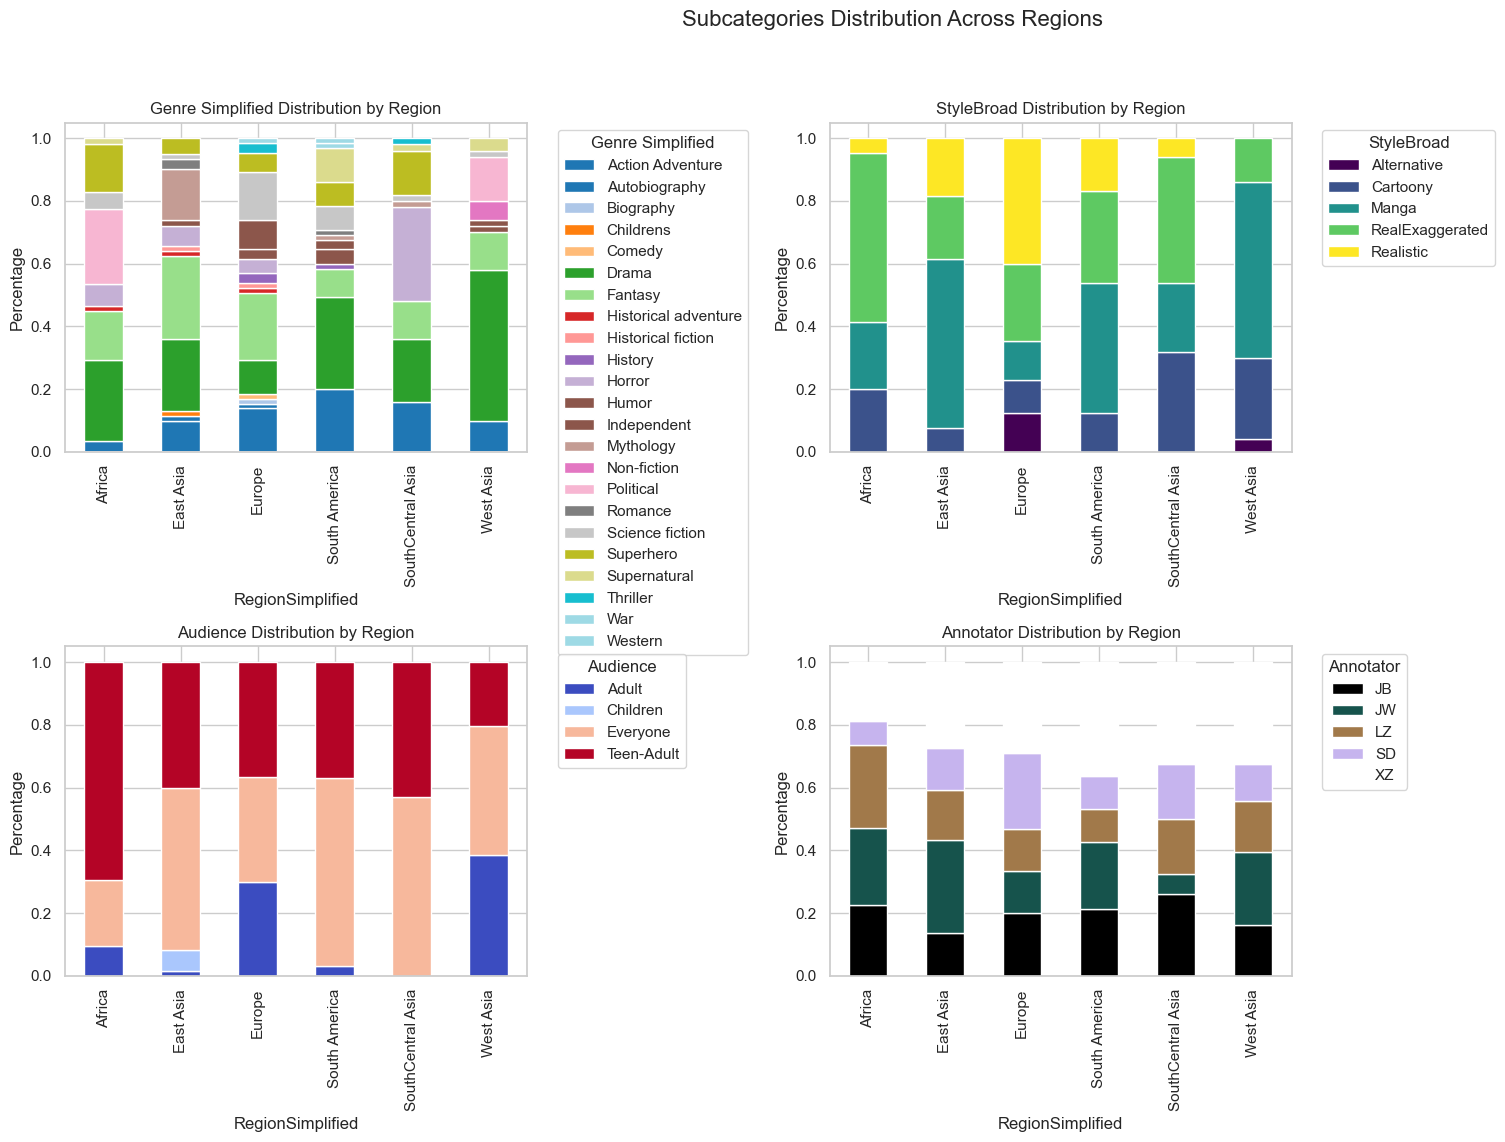

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Calculate the number of unique comics for each category within each RegionSimplified
region_genre_comics_count = df_region_sample.groupby(['RegionSimplified', 'Genre Simplified'])['Document Name'].nunique().unstack().fillna(0)
region_style_comics_count = df_region_sample.groupby(['RegionSimplified', 'StyleBroad'])['Document Name'].nunique().unstack().fillna(0)
region_audience_comics_count = df_region_sample.groupby(['RegionSimplified', 'Audience'])['Document Name'].nunique().unstack().fillna(0)
region_annotator_comics_count = df_region_sample.groupby(['RegionSimplified', 'Annotator'])['Document Name'].nunique().unstack().fillna(0)

# Prepare the figure
regions = df_region_sample['RegionSimplified'].unique()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Subcategories Distribution Across Regions', fontsize=16, y=0.95)

# Distribution of Genre Simplified
genre_percentages = region_genre_comics_count.div(region_genre_comics_count.sum(axis=1), axis=0)
genre_percentages.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='tab20')
axes[0, 0].set_title("Genre Simplified Distribution by Region")
axes[0, 0].set_xlabel("RegionSimplified")
axes[0, 0].set_ylabel("Percentage")
axes[0, 0].legend(title="Genre Simplified", bbox_to_anchor=(1.05, 1), loc='upper left')

# # Distribution of StyleBroad
style_percentages = region_style_comics_count.div(region_style_comics_count.sum(axis=1), axis=0)
style_percentages.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='viridis')
axes[0, 1].set_title("StyleBroad Distribution by Region")
axes[0, 1].set_xlabel("RegionSimplified")
axes[0, 1].set_ylabel("Percentage")
axes[0, 1].legend(title="StyleBroad", bbox_to_anchor=(1.05, 1), loc='upper left')

# Audience 
audience_percentages = region_audience_comics_count.div(region_audience_comics_count.sum(axis=1), axis=0)
audience_percentages.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='coolwarm')
axes[1, 0].set_title("Audience Distribution by Region")
axes[1, 0].set_xlabel("RegionSimplified")
axes[1, 0].set_ylabel("Percentage")
axes[1, 0].legend(title="Audience", bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotator
annotator_percentages = region_annotator_comics_count.div(region_annotator_comics_count.sum(axis=1), axis=0)
annotator_percentages.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='cubehelix')
axes[1, 1].set_title("Annotator Distribution by Region")
axes[1, 1].set_xlabel("RegionSimplified")
axes[1, 1].set_ylabel("Percentage")
axes[1, 1].legend(title="Annotator", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 0.85, 0.92])

plt.show()

<Figure size 1000x600 with 0 Axes>

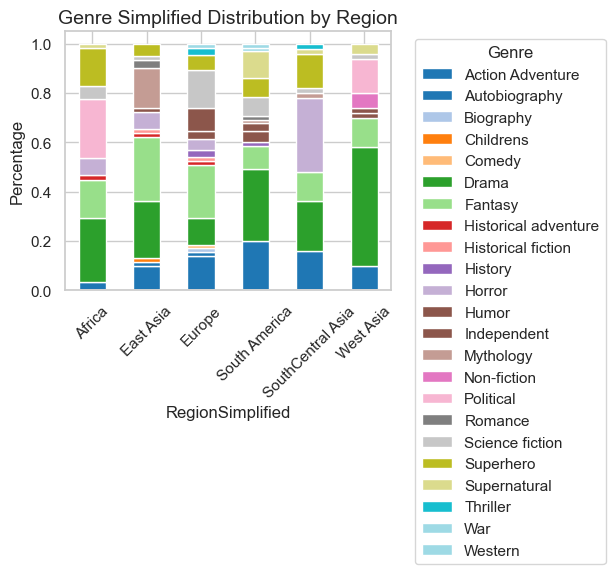

<Figure size 1000x600 with 0 Axes>

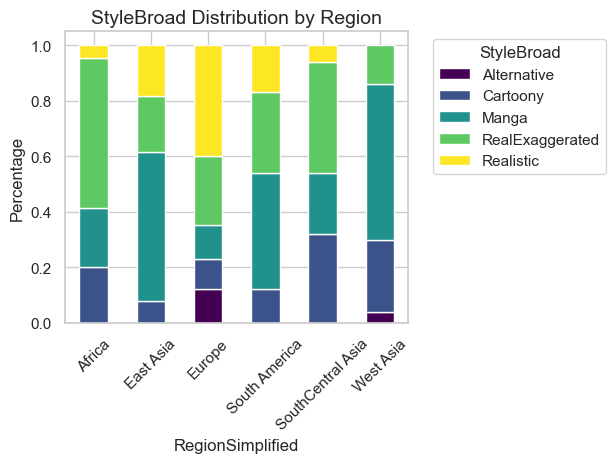

<Figure size 1000x600 with 0 Axes>

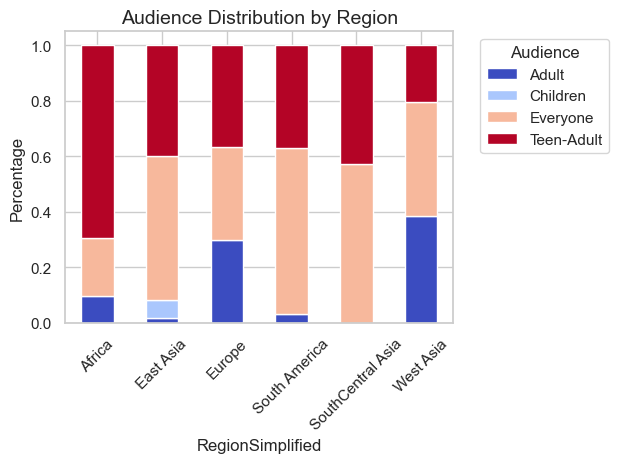

<Figure size 1000x600 with 0 Axes>

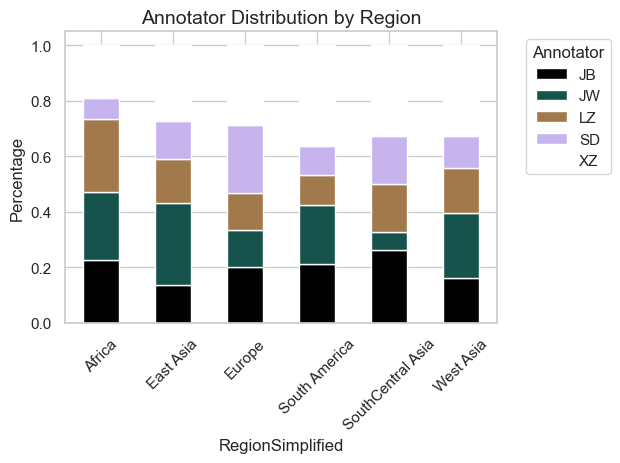

/var/folders/qr/80cgq6_d629dw28l_btkrpq80000gn/T/ipykernel_7773/3175286174.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

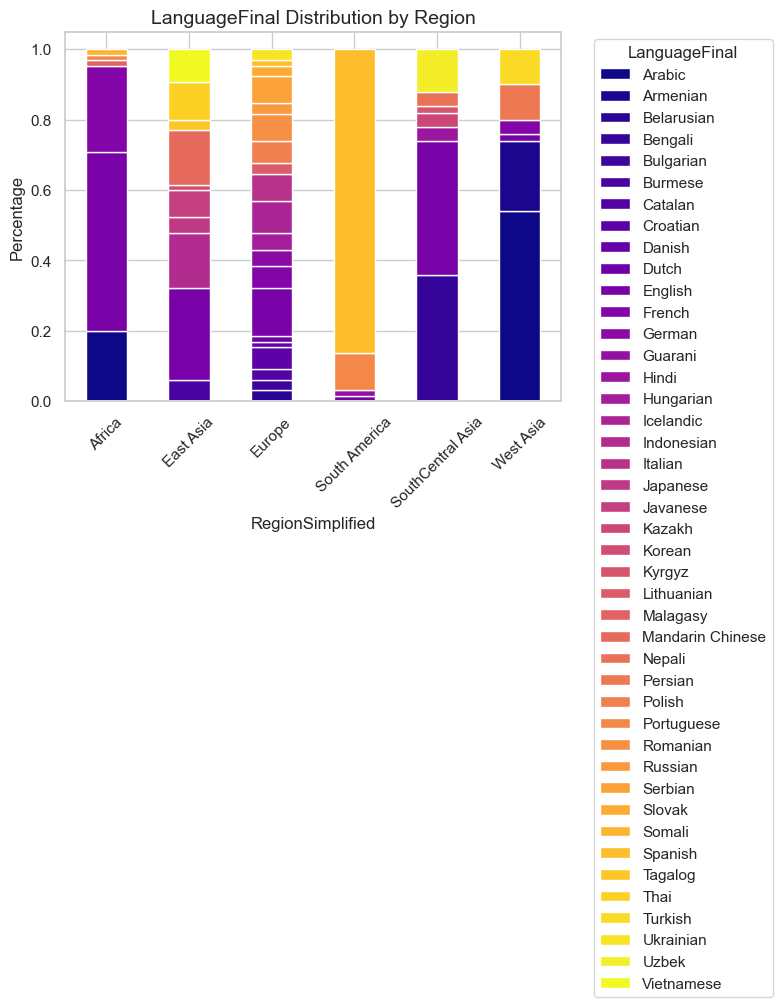

In [29]:
# Set visual style
sns.set(style="whitegrid")

region_genre_comics_count = df_region_sample.groupby(['RegionSimplified', 'Genre Simplified'])['Document Name'].nunique().unstack().fillna(0)
region_style_comics_count = df_region_sample.groupby(['RegionSimplified', 'StyleBroad'])['Document Name'].nunique().unstack().fillna(0)
region_audience_comics_count = df_region_sample.groupby(['RegionSimplified', 'Audience'])['Document Name'].nunique().unstack().fillna(0)
region_annotator_comics_count = df_region_sample.groupby(['RegionSimplified', 'Annotator'])['Document Name'].nunique().unstack().fillna(0)
region_language_comics_count = df_region_sample.groupby(['RegionSimplified', 'LanguageFinal'])['Document Name'].nunique().unstack().fillna(0)

genre_percentages = region_genre_comics_count.div(region_genre_comics_count.sum(axis=1), axis=0)
style_percentages = region_style_comics_count.div(region_style_comics_count.sum(axis=1), axis=0)
audience_percentages = region_audience_comics_count.div(region_audience_comics_count.sum(axis=1), axis=0)
annotator_percentages = region_annotator_comics_count.div(region_annotator_comics_count.sum(axis=1), axis=0)
language_percentages = region_language_comics_count.div(region_language_comics_count.sum(axis=1), axis=0)

def plot_distribution(data, title, colormap):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', stacked=True, colormap=colormap)
    plt.title(title, fontsize=14)
    plt.xlabel("RegionSimplified", fontsize=12)
    plt.ylabel("Percentage", fontsize=12)
    plt.legend(title=title.split()[0], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_distribution(genre_percentages, "Genre Simplified Distribution by Region", 'tab20')
plot_distribution(style_percentages, "StyleBroad Distribution by Region", 'viridis')
plot_distribution(audience_percentages, "Audience Distribution by Region", 'coolwarm')
plot_distribution(annotator_percentages, "Annotator Distribution by Region", 'cubehelix')
plot_distribution(language_percentages, "LanguageFinal Distribution by Region", 'plasma')

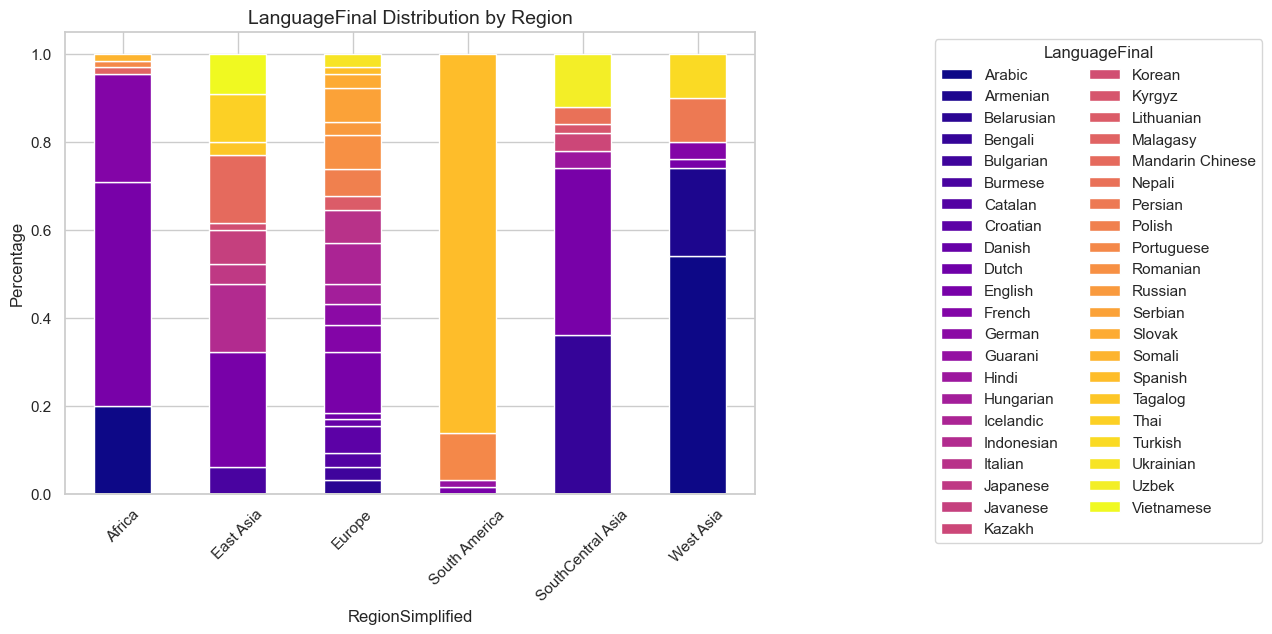

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

language_percentages.plot(
    kind='bar',
    stacked=True,
    colormap='plasma',
    ax=ax 
)

ax.set_title("LanguageFinal Distribution by Region", fontsize=14)
ax.set_xlabel("RegionSimplified", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.tick_params(axis='x', rotation=45)

ax.legend(
    title="LanguageFinal",
    bbox_to_anchor=(1.25, 1),
    loc='upper left',
    ncol=2
)

fig.subplots_adjust(right=0.7)  

plt.show()

In [32]:
import pandas as pd

# Calculate the number of unique comics for each category within each RegionSimplified
region_genre_comics_count = df_region_sample.groupby(['RegionSimplified', 'Genre Simplified'])['Document Name'].nunique().unstack().fillna(0)
region_style_comics_count = df_region_sample.groupby(['RegionSimplified', 'StyleBroad'])['Document Name'].nunique().unstack().fillna(0)
region_audience_comics_count = df_region_sample.groupby(['RegionSimplified', 'Audience'])['Document Name'].nunique().unstack().fillna(0)
region_annotator_comics_count = df_region_sample.groupby(['RegionSimplified', 'Annotator'])['Document Name'].nunique().unstack().fillna(0)
region_language_comics_count = df_region_sample.groupby(['RegionSimplified', 'LanguageFinal'])['Document Name'].nunique().unstack().fillna(0)

# Calculate the percentage of each category within each region
genre_percentages = region_genre_comics_count.div(region_genre_comics_count.sum(axis=1), axis=0) * 100
style_percentages = region_style_comics_count.div(region_style_comics_count.sum(axis=1), axis=0) * 100
audience_percentages = region_audience_comics_count.div(region_audience_comics_count.sum(axis=1), axis=0) * 100
annotator_percentages = region_annotator_comics_count.div(region_annotator_comics_count.sum(axis=1), axis=0) * 100
language_percentages = region_language_comics_count.div(region_language_comics_count.sum(axis=1), axis=0) * 100

# Filter and print data with percentages over 50%
def print_over_50(data, category_name):
    print(f"\n{category_name} - Categories with more than 50%:")
    over_50 = data[data > 50].dropna(how='all')
    for region in over_50.index:
        for category in over_50.columns:
            if pd.notna(over_50.loc[region, category]):
                print(f"Region: {region}, {category_name}: {category}, Percentage: {over_50.loc[region, category]:.2f}%")

# Output data with percentages over 50% for each category
print_over_50(genre_percentages, 'Genre Simplified')
print_over_50(style_percentages, 'StyleBroad')
print_over_50(audience_percentages, 'Audience')
print_over_50(annotator_percentages, 'Annotator')
print_over_50(language_percentages, 'LanguageFinal')



Genre Simplified - Categories with more than 50%:

StyleBroad - Categories with more than 50%:
Region: Africa, StyleBroad: RealExaggerated, Percentage: 53.85%
Region: East Asia, StyleBroad: Manga, Percentage: 53.85%
Region: West Asia, StyleBroad: Manga, Percentage: 56.00%

Audience - Categories with more than 50%:
Region: Africa, Audience: Teen-Adult, Percentage: 69.35%
Region: East Asia, Audience: Everyone, Percentage: 51.67%
Region: South America, Audience: Everyone, Percentage: 60.00%
Region: SouthCentral Asia, Audience: Everyone, Percentage: 57.14%

Annotator - Categories with more than 50%:

LanguageFinal - Categories with more than 50%:
Region: Africa, LanguageFinal: English, Percentage: 50.77%
Region: South America, LanguageFinal: Spanish, Percentage: 86.15%
Region: West Asia, LanguageFinal: Arabic, Percentage: 54.00%


In [33]:
import pandas as pd

unique_docs_per_region = df_region_sample.groupby('RegionSimplified')['Document Name'].nunique()

print("Unique Document Name count by RegionSimplified:")
print(unique_docs_per_region)

Unique Document Name count by RegionSimplified:
RegionSimplified
Africa               65
East Asia            65
Europe               65
South America        65
SouthCentral Asia    50
West Asia            50
Name: Document Name, dtype: int64


In [34]:
import pandas as pd

# Calculate the number of unique Document Names in each RegionSimplified (Total comics)
total_comics = df_region_sample.groupby('RegionSimplified')['Document Name'].nunique()

# Calculate the maximum Page Number for each Document Name in each RegionSimplified (Total pages)
total_pages = df_region_sample.groupby(['RegionSimplified', 'Document Name'])['Page Number'].max().groupby('RegionSimplified').sum()

# Calculate the count of Page Numbers in each RegionSimplified (Total panels)
total_panels = df_region_sample.groupby('RegionSimplified')['Page Number'].count()

# Combine the results into a single DataFrame
result = pd.DataFrame({
    'Total_comics': total_comics,
    'Total_pages': total_pages,
    'Total_panels': total_panels
}).reset_index()

# Calculate the number of Panels per Page
result['Panels_per_page'] = (result['Total_panels'] / result['Total_pages']).round(3)

# Round the result DataFrame to three decimal places
result = result.round(3)

# Display the result
print(result)

    RegionSimplified  Total_comics  Total_pages  Total_panels  Panels_per_page
0             Africa            65          699          3218            4.604
1          East Asia            65         1186          5105            4.304
2             Europe            65          862          4407            5.113
3      South America            65          869          4432            5.100
4  SouthCentral Asia            50          802          3660            4.564
5          West Asia            50          592          3354            5.666


In [36]:
# Define the output CSV file path
output_csv_path = 'region_sample.csv'

# Save the DataFrame to a new CSV file
df_region_sample.to_csv(output_csv_path, index=False)

print(f"CSV file has been saved to: {output_csv_path}")

CSV file has been saved to: region_sample.csv


In [43]:
# Merge Genre
# Define mapping rules
genre_merge_map = {
    'Action Adventure': 'Adventure',
    'Historical adventure': 'Adventure',

    'Non-fiction': 'Non-fiction',
    'Autobiography': 'Non-fiction',
    'Biography': 'Non-fiction',
    'History': 'Non-fiction',
    'Political': 'Non-fiction',
    'War': 'Non-fiction',

    'Fantasy': 'Fantasy',

    'Historical fiction': 'Historical fiction',

    'Mythology': 'Mythology',

    'Science fiction': 'Science fiction',

    'Superhero': 'Supernatural',
    'Supernatural': 'Supernatural',

    'Romance': 'Romance',

    'Horror': 'Horror',
    'Thriller': 'Horror',

    'Drama': 'Drama',
    'Humor': 'Humor',
    'Childrens': 'Childrens',
    'Western': 'Western',
    'Independent': 'Independent'
}

# Mapping
df_region_sample['Genre Final'] = df_region_sample['Genre Simplified'].map(genre_merge_map).fillna('Other')

<Figure size 1000x600 with 0 Axes>

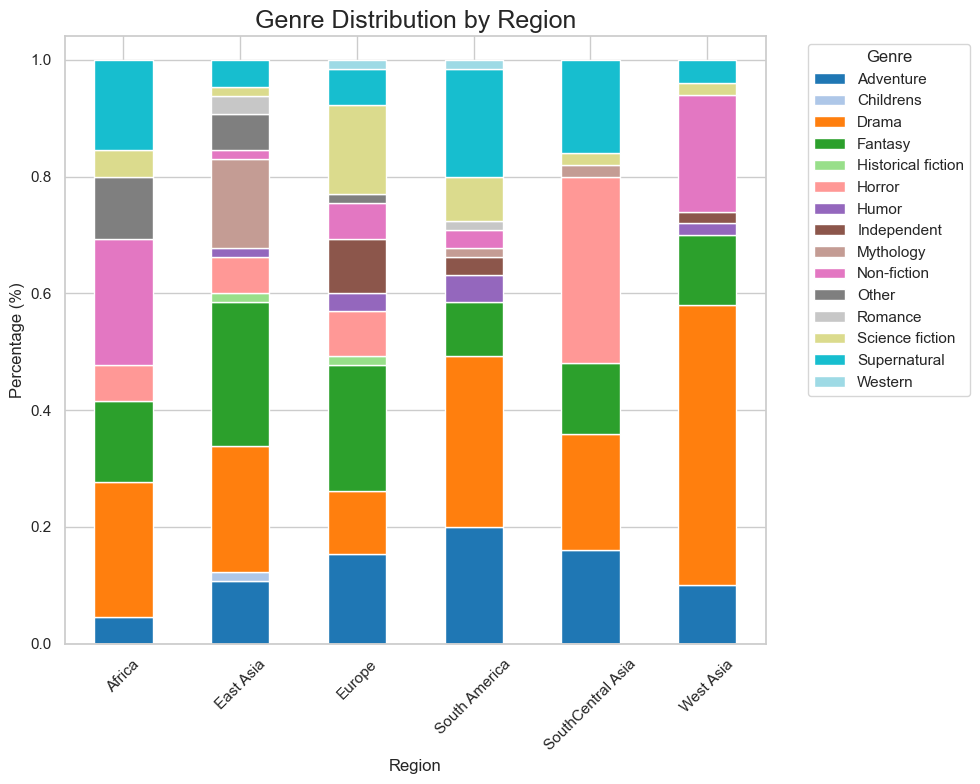

In [44]:
# Aggregate and calculate percentages
region_genre_counts = df_region_sample.groupby(['RegionSimplified', 'Genre Final'])['Document Name'].nunique().unstack().fillna(0)
genre_percentages = region_genre_counts.div(region_genre_counts.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
ax = genre_percentages.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 8))

plt.title("Genre Distribution by Region", fontsize=18)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

ax.set_ylim(0, 1.04)

plt.tight_layout()
plt.show()

In [45]:
region_genre_counts = df_region_sample.groupby(['RegionSimplified', 'Genre Final'])['Document Name'].nunique()

region_genre_table = region_genre_counts.unstack().fillna(0)

region_genre_percentages = region_genre_table.div(region_genre_table.sum(axis=1), axis=0) * 100
region_genre_percentages = region_genre_percentages.round(2)

print(region_genre_percentages)

Genre Final        Adventure  Childrens  Drama  Fantasy  Historical fiction  \
RegionSimplified                                                              
Africa                  4.62       0.00  23.08    13.85                0.00   
East Asia              10.77       1.54  21.54    24.62                1.54   
Europe                 15.38       0.00  10.77    21.54                1.54   
South America          20.00       0.00  29.23     9.23                0.00   
SouthCentral Asia      16.00       0.00  20.00    12.00                0.00   
West Asia              10.00       0.00  48.00    12.00                0.00   

Genre Final        Horror  Humor  Independent  Mythology  Non-fiction  Other  \
RegionSimplified                                                               
Africa               6.15   0.00         0.00       0.00        21.54  10.77   
East Asia            6.15   1.54         0.00      15.38         1.54   6.15   
Europe               7.69   3.08         9.23  

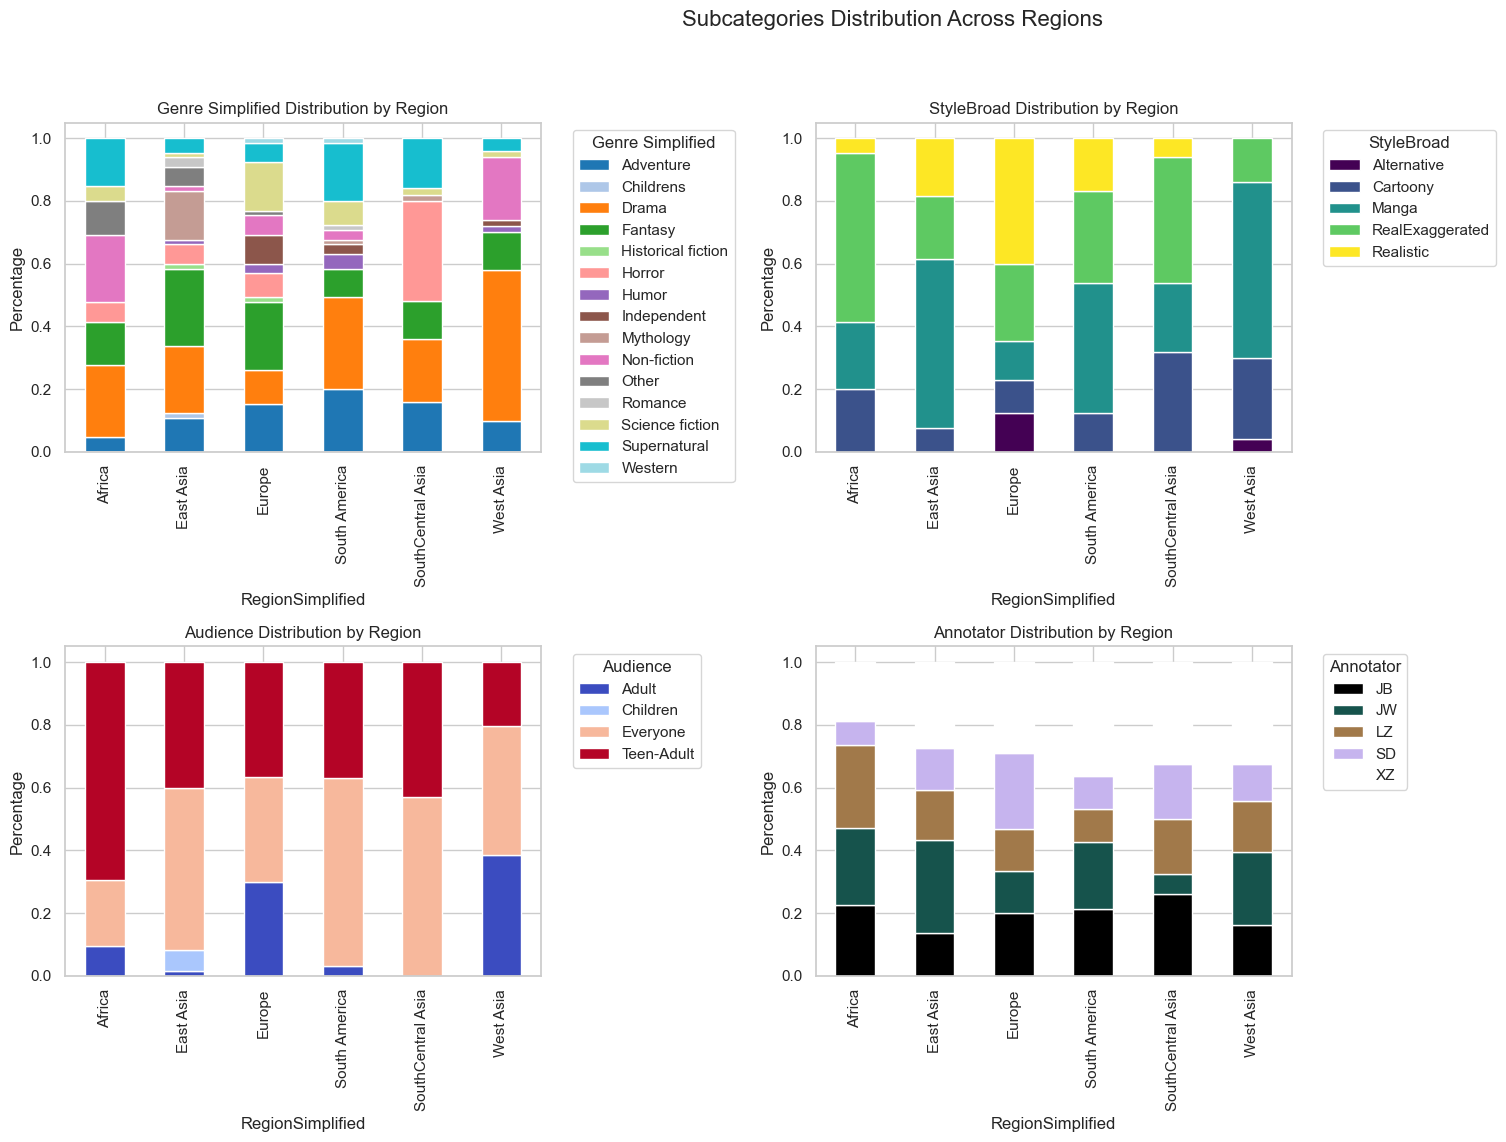

In [46]:
# Set visual style
sns.set(style="whitegrid")

# Calculate the number of unique comics for each category within each RegionSimplified
region_genre_comics_count = df_region_sample.groupby(['RegionSimplified', 'Genre Final'])['Document Name'].nunique().unstack().fillna(0)
region_style_comics_count = df_region_sample.groupby(['RegionSimplified', 'StyleBroad'])['Document Name'].nunique().unstack().fillna(0)
region_audience_comics_count = df_region_sample.groupby(['RegionSimplified', 'Audience'])['Document Name'].nunique().unstack().fillna(0)
region_annotator_comics_count = df_region_sample.groupby(['RegionSimplified', 'Annotator'])['Document Name'].nunique().unstack().fillna(0)

# Prepare the figure
regions = df_region_sample['RegionSimplified'].unique()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Subcategories Distribution Across Regions', fontsize=16, y=0.95)

# Distribution of Genre Simplified
genre_percentages = region_genre_comics_count.div(region_genre_comics_count.sum(axis=1), axis=0)
genre_percentages.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='tab20')
axes[0, 0].set_title("Genre Simplified Distribution by Region")
axes[0, 0].set_xlabel("RegionSimplified")
axes[0, 0].set_ylabel("Percentage")
axes[0, 0].legend(title="Genre Simplified", bbox_to_anchor=(1.05, 1), loc='upper left')

# Distribution of StyleBroad
style_percentages = region_style_comics_count.div(region_style_comics_count.sum(axis=1), axis=0)
style_percentages.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='viridis')
axes[0, 1].set_title("StyleBroad Distribution by Region")
axes[0, 1].set_xlabel("RegionSimplified")
axes[0, 1].set_ylabel("Percentage")
axes[0, 1].legend(title="StyleBroad", bbox_to_anchor=(1.05, 1), loc='upper left')

# Audience 
audience_percentages = region_audience_comics_count.div(region_audience_comics_count.sum(axis=1), axis=0)
audience_percentages.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='coolwarm')
axes[1, 0].set_title("Audience Distribution by Region")
axes[1, 0].set_xlabel("RegionSimplified")
axes[1, 0].set_ylabel("Percentage")
axes[1, 0].legend(title="Audience", bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotator
annotator_percentages = region_annotator_comics_count.div(region_annotator_comics_count.sum(axis=1), axis=0)
annotator_percentages.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='cubehelix')
axes[1, 1].set_title("Annotator Distribution by Region")
axes[1, 1].set_xlabel("RegionSimplified")
axes[1, 1].set_ylabel("Percentage")
axes[1, 1].legend(title="Annotator", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 0.85, 0.92]) 

plt.show()

In [1]:
import pandas as pd

In [3]:
df_region_sample = pd.read_csv('/Users/zhouxiaoyu/desktop/shapes_visual_stories/region_sample.csv')

In [4]:
!pip install statsmodels # Install the statsmodels library

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [6]:
!pip install scikit-posthocs
!pip install cliffs_delta
!pip install ruptures
!pip install statsmodels

Mean Calculated from SMA Values


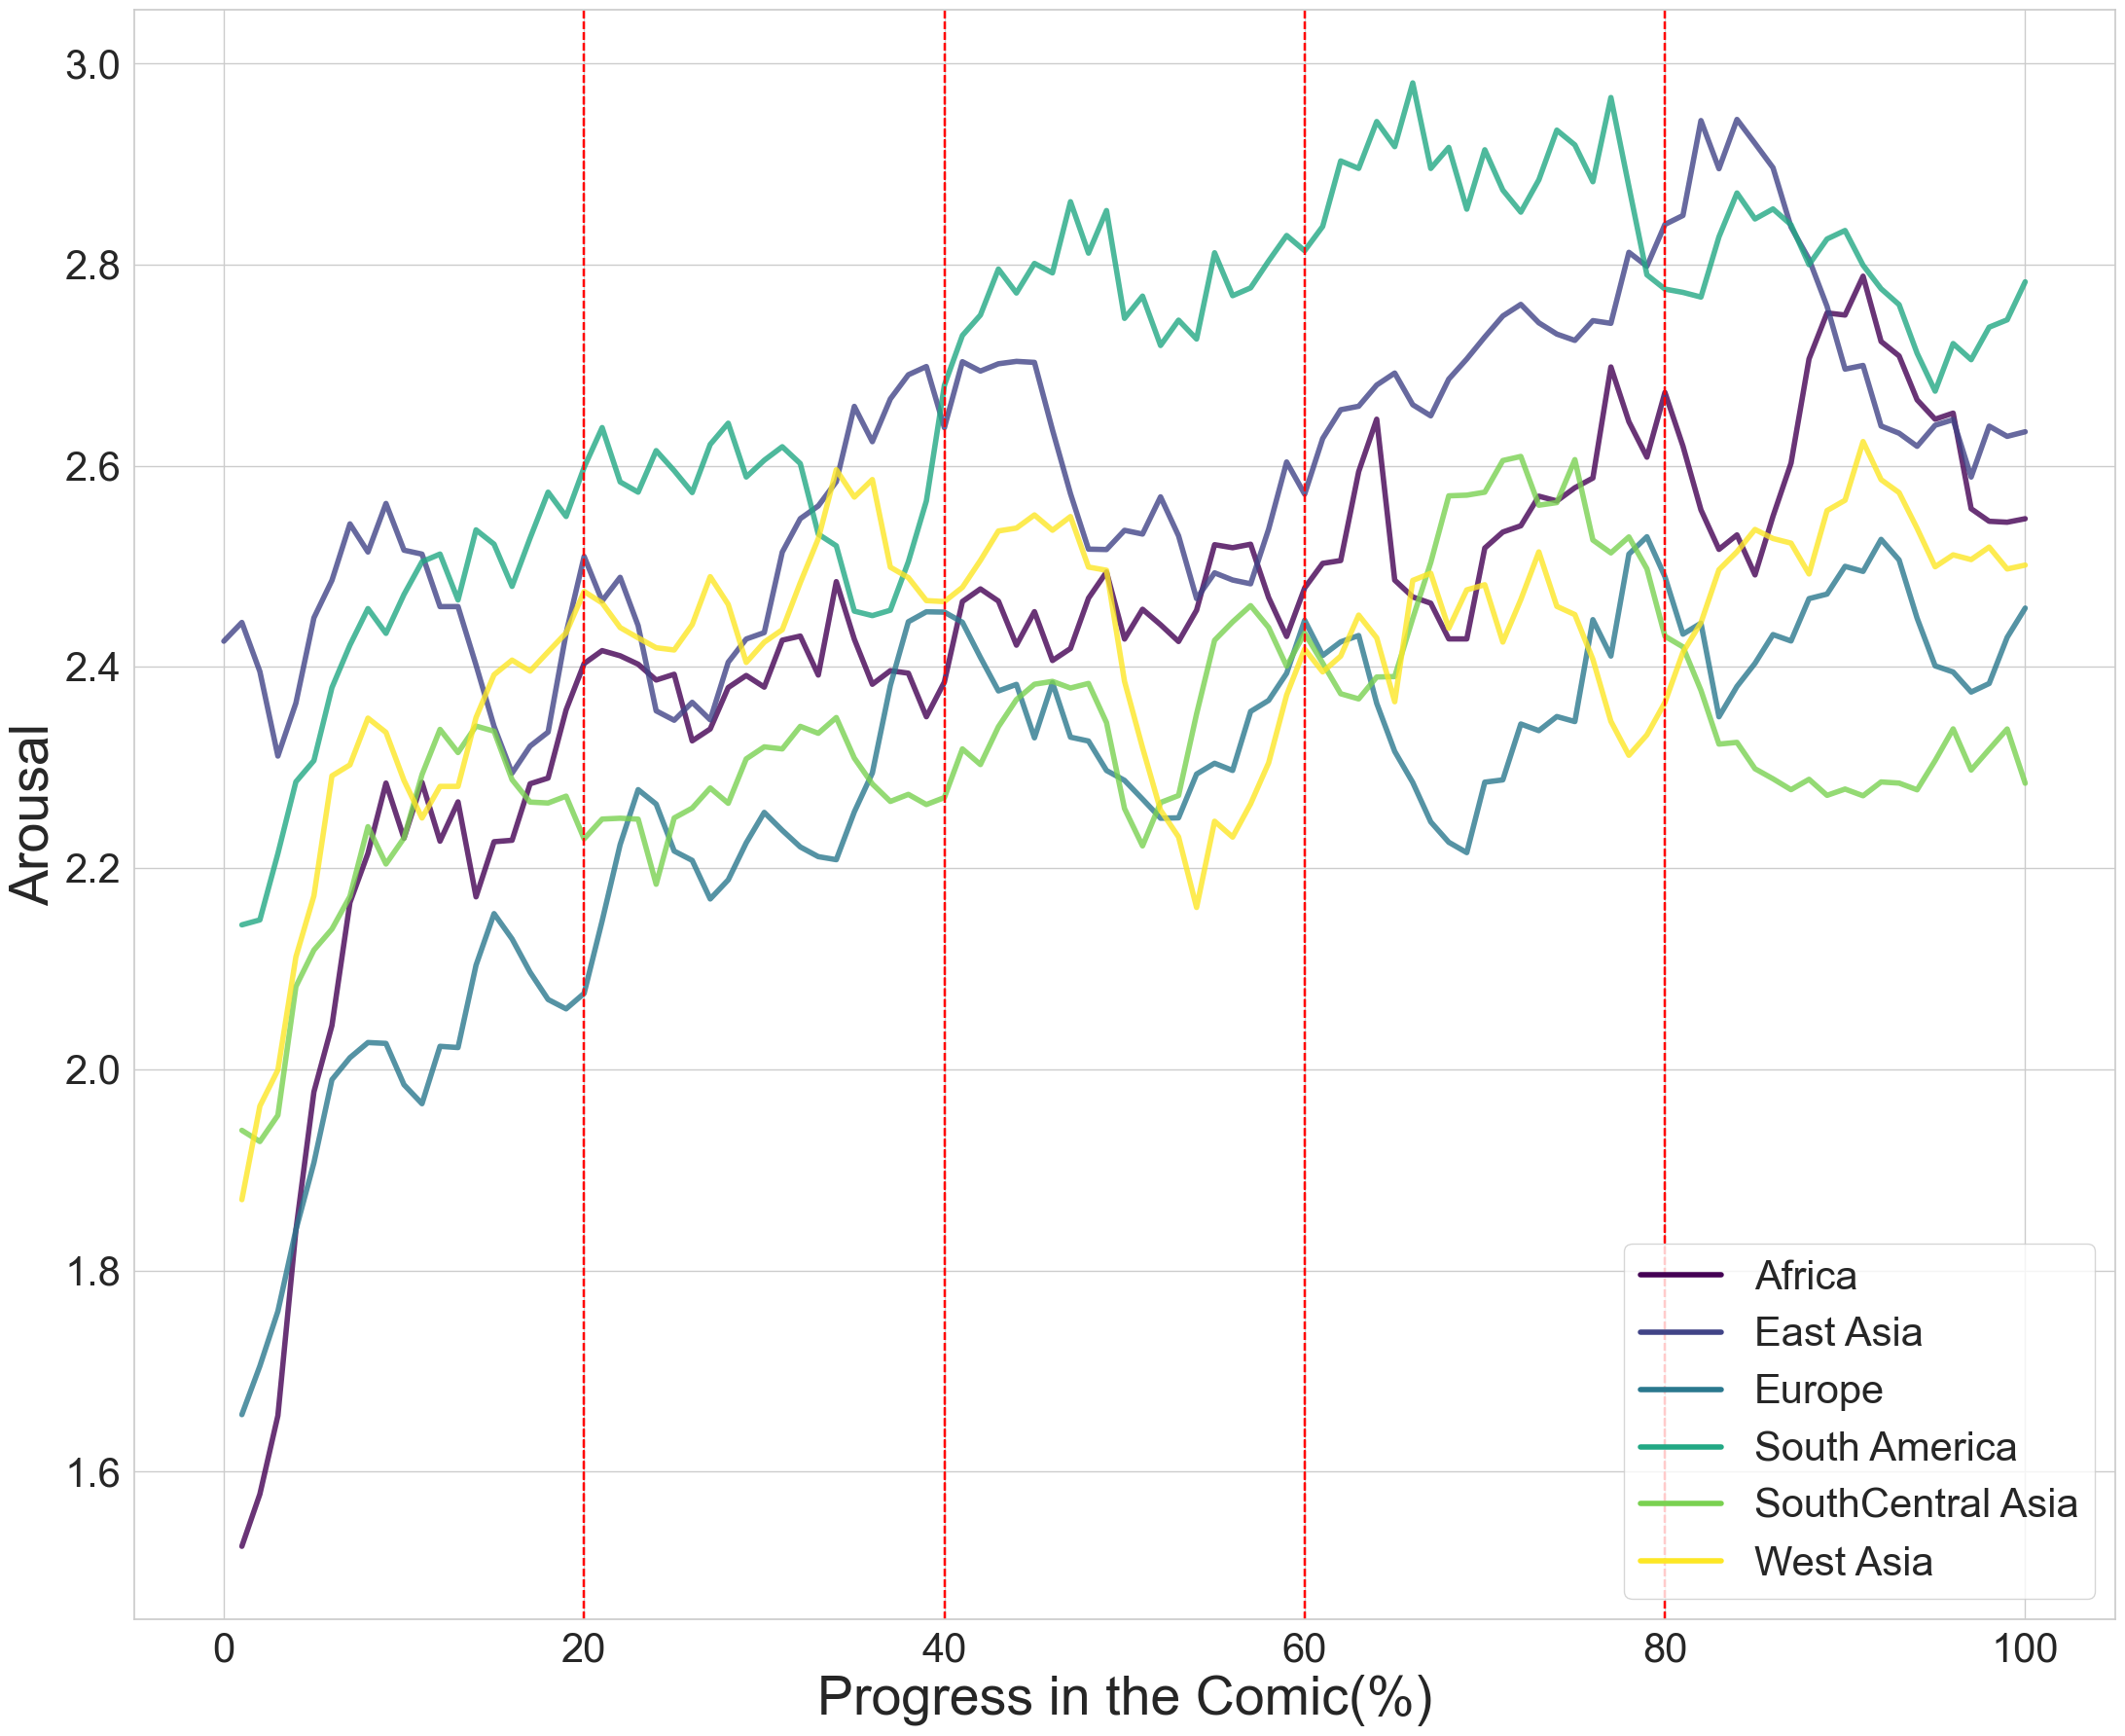

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from matplotlib.lines import Line2D

# Set plot style
sns.set(style="whitegrid")

# Use a colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
colors = [cmap(i / 5) for i in range(6)]
region_colors = {
    'Africa': colors[0],
    'East Asia': colors[1],
    'Europe': colors[2],
    'South America': colors[3],
    'SouthCentral Asia': colors[4],
    'West Asia': colors[5]
}

def calculate_metrics(data, value_col, index_col, window):
    
    mean_arousal_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_arousal_by_panel['Arousal_SMA'] = mean_arousal_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()

    mean_arousal_by_panel[index_col] = mean_arousal_by_panel[index_col] * 100
    return mean_arousal_by_panel

# Define the rolling window size
window = 5

# Create plot
fig, ax2 = plt.subplots(figsize=(22, 18))

print("Mean Calculated from SMA Values")

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_arousal_by_panel = calculate_metrics(region_data, 'Arousal', 'OrdinalPanel%Rounded2', window)
    
    # Plot SMA line
    ax2.plot(mean_arousal_by_panel['OrdinalPanel%Rounded2'], mean_arousal_by_panel['Arousal_SMA'], color=color, linewidth=4, label=f'{region} SMA (window={window})', alpha=0.8)

    # Split data into 5 segments and add dashed lines
    num_segments = 5
    segment_indices = np.array_split(mean_arousal_by_panel.index, num_segments)
    segment_points = [mean_arousal_by_panel['OrdinalPanel%Rounded2'].iloc[segment[-1]] for segment in segment_indices]

    for sp in segment_points[:-1]:  # Ignore the last split point as it's just the end
        ax2.axvline(x=sp, color='red', linestyle='--')

# Set up legend
legend_lines = [Line2D([0], [0], color=color, linewidth=4) for color in region_colors.values()]
legend_labels = [f'{region}' for region in region_colors.keys()]

ax2.legend(legend_lines, legend_labels, loc='lower right', fontsize=30, frameon=True)

ax2.set_title('', fontsize=40)
ax2.set_xlabel('Progress in the Comic(%)', fontsize=40)
ax2.set_ylabel('Arousal', fontsize=40)

ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

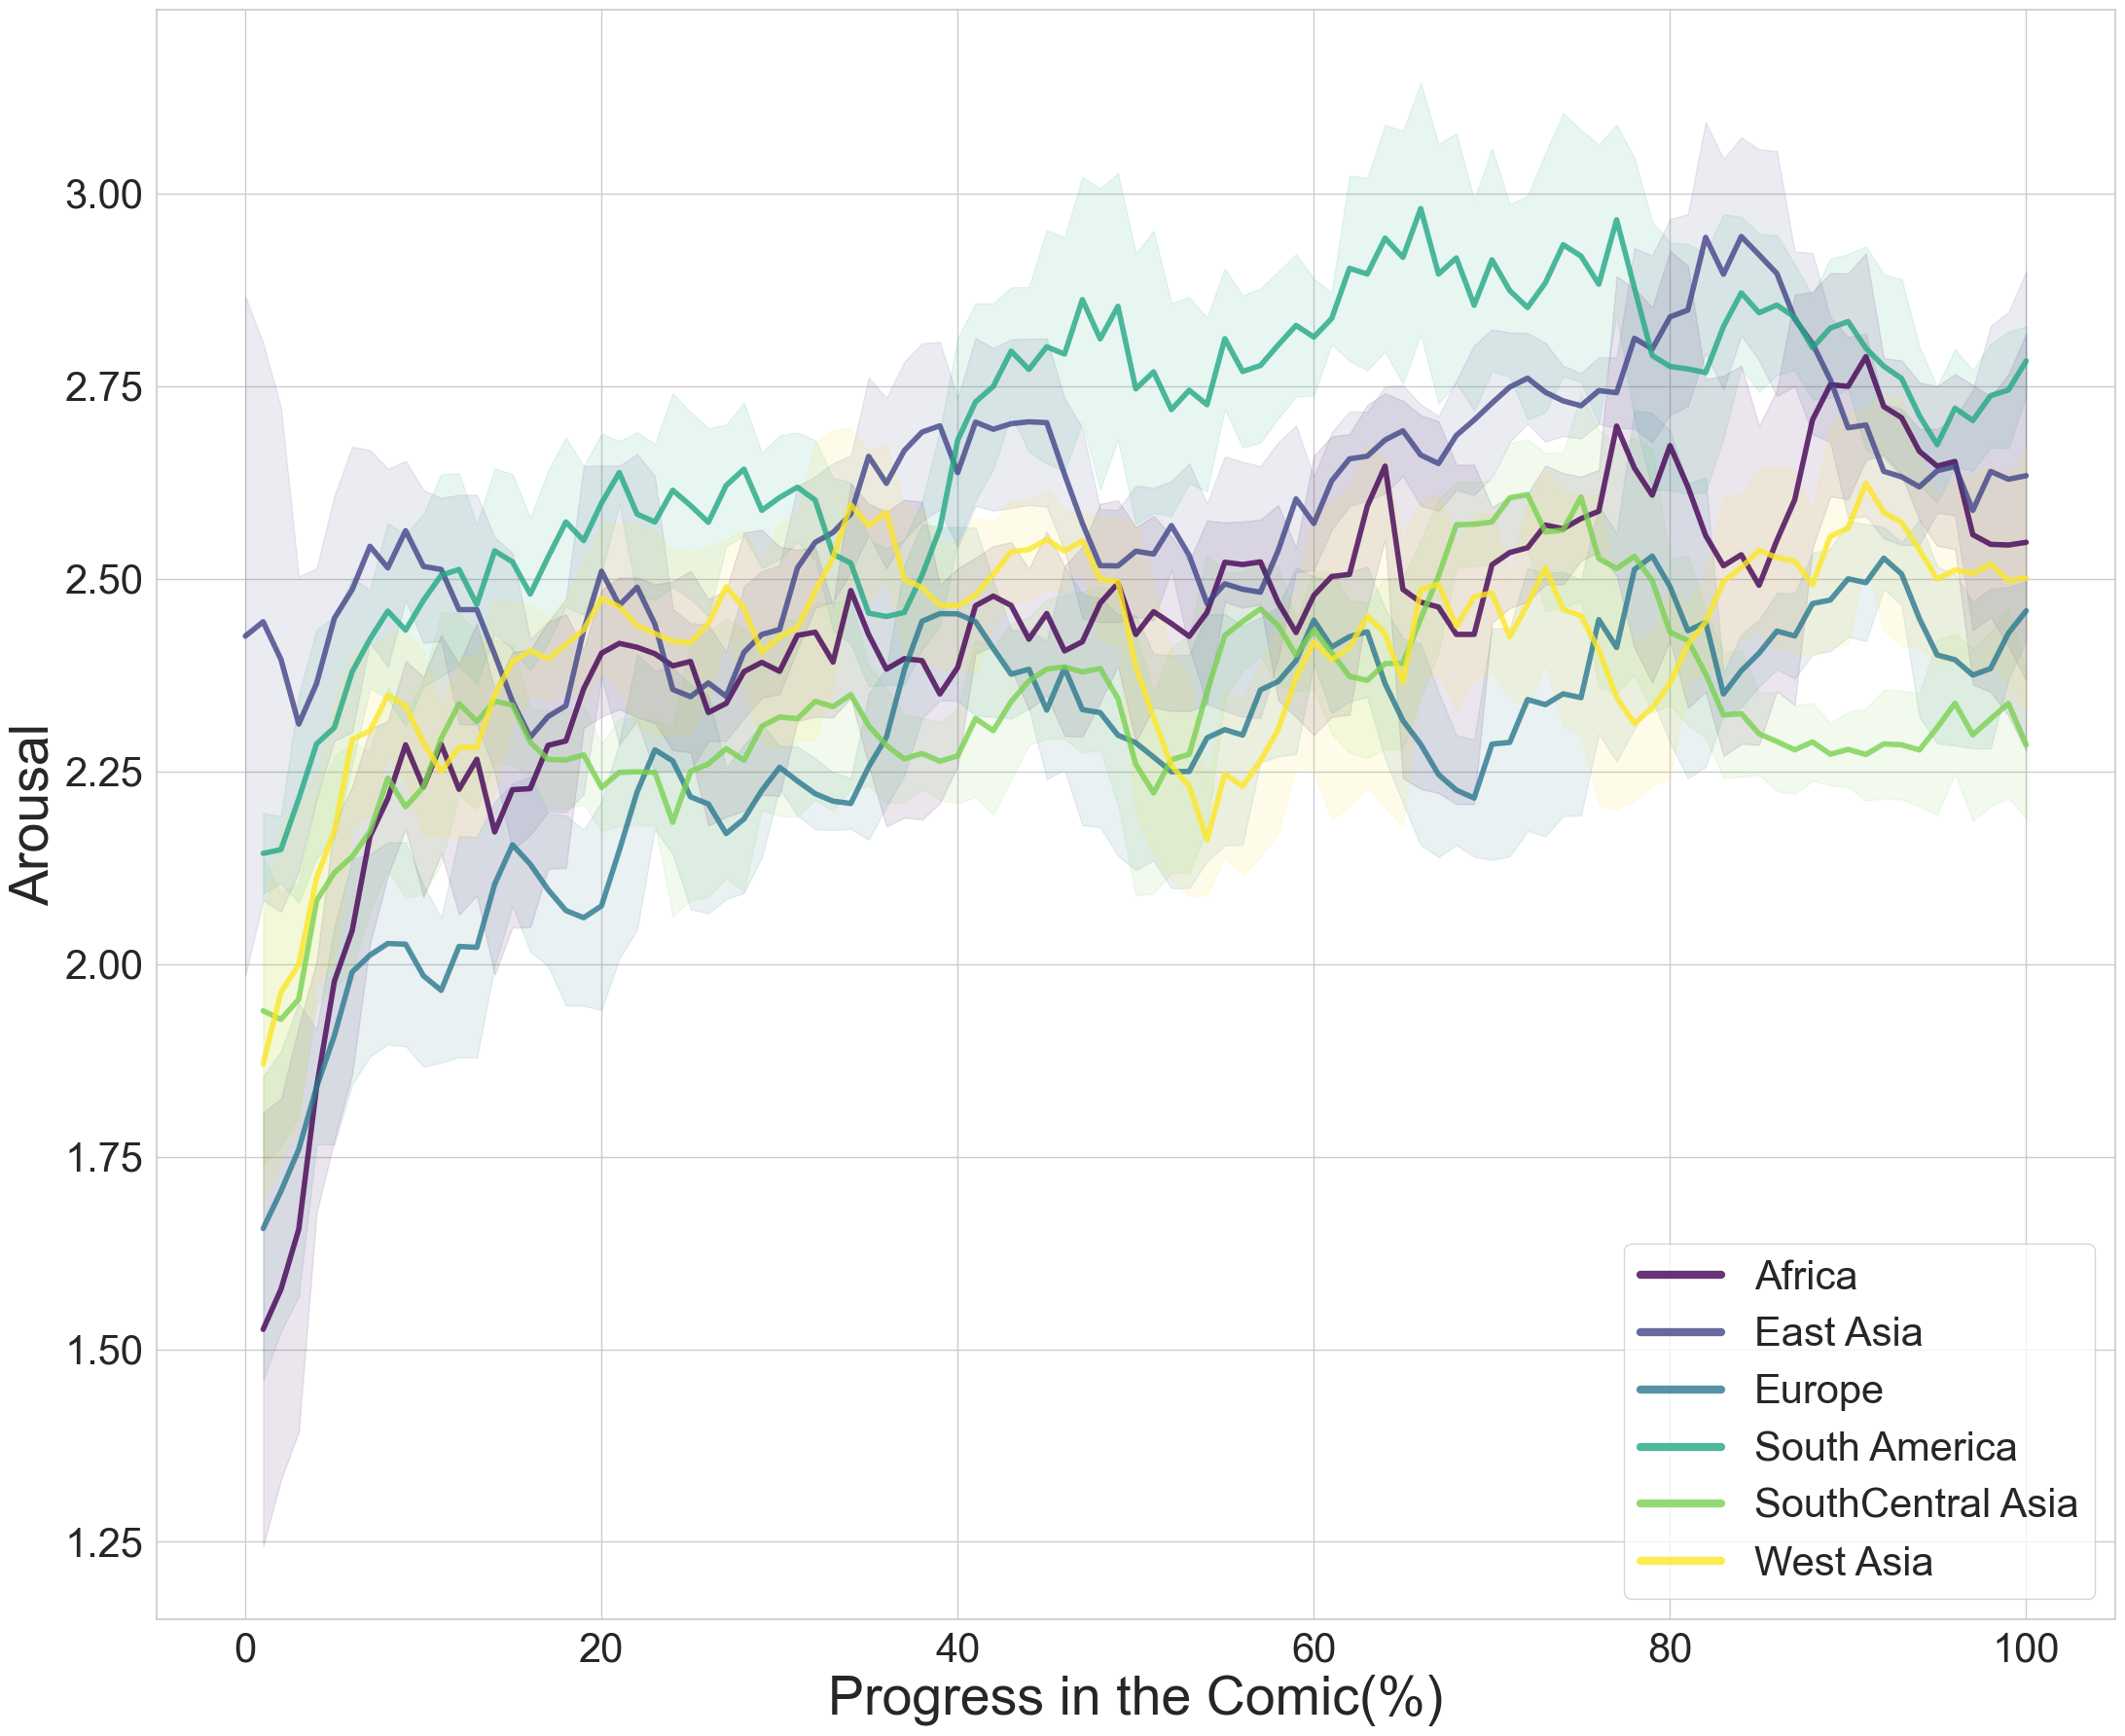

In [8]:
# Set plot style
sns.set(style="whitegrid")

# Define colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
region_names = ['Africa', 'East Asia', 'Europe', 'South America', 'SouthCentral Asia', 'West Asia']
colors = [cmap(i / (len(region_names) - 1)) for i in range(len(region_names))]
region_colors = {region: colors[idx] for idx, region in enumerate(region_names)}

def calculate_metrics(data, value_col, index_col, window):

    mean_arousal_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_arousal_by_panel['Arousal_SMA'] = mean_arousal_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    mean_arousal_by_panel['Arousal_SE'] = mean_arousal_by_panel[value_col].rolling(window=window, min_periods=1, center=True).std() / np.sqrt(window)
    
    mean_arousal_by_panel[index_col] = mean_arousal_by_panel[index_col] * 100
    return mean_arousal_by_panel

# Define the rolling window size
window = 5

# Create the first plot (with confidence intervals)
fig, ax1 = plt.subplots(figsize=(22, 18))

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_arousal_by_panel = calculate_metrics(region_data, 'Arousal', 'OrdinalPanel%Rounded2', window)
    
    # Calculate 97.5% confidence interval
    ci95 = norm.ppf(0.975)
    mean_arousal_by_panel['Arousal_CI'] = ci95 * mean_arousal_by_panel['Arousal_SE']

    # Plot SMA line
    ax1.plot(mean_arousal_by_panel['OrdinalPanel%Rounded2'], mean_arousal_by_panel['Arousal_SMA'], color=color, linewidth=4, label=f'{region}', alpha=0.8)
    
    # Plot confidence interval
    ax1.fill_between(mean_arousal_by_panel['OrdinalPanel%Rounded2'], 
                     mean_arousal_by_panel['Arousal_SMA'] - mean_arousal_by_panel['Arousal_CI'], 
                     mean_arousal_by_panel['Arousal_SMA'] + mean_arousal_by_panel['Arousal_CI'], 
                     color=color, alpha=0.1)

ax1.set_title('', fontsize=40)
ax1.set_xlabel('Progress in the Comic(%)', fontsize=40)
ax1.set_ylabel('Arousal', fontsize=40)

# Configure legend
legend = ax1.legend(loc='lower right', fontsize=30, frameon=True)
for line in legend.get_lines():
    line.set_linewidth(6) 

ax1.grid(True)
ax1.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

In [52]:
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Store ANOVA results for each region
anova_results = {}

# Function to perform ANOVA and post-hoc test
def perform_anova_and_posthoc(data, value_col, index_col, num_segments):
    # Split data into num_segments segments based on index_col
    segment_indices = np.array_split(data[index_col].unique(), num_segments)
    
    # Collect data for each segment
    segment_data = []
    for segment in segment_indices:
        segment_values = data[data[index_col].isin(segment)][value_col]
        segment_data.append(segment_values)
    
    # Perform ANOVA test
    f_stat, p_value = f_oneway(*segment_data)
    print(f'ANOVA results for {region}: F-statistic = {f_stat}, p-value = {p_value}')
    
    # Check for significance
    if p_value < 0.05:
        print(f'Post-hoc test for {region} (p-value < 0.05):')
        # Combine data and labels for post-hoc
        combined_data = pd.DataFrame({value_col: data[value_col], index_col: pd.cut(data[index_col], bins=num_segments, labels=range(num_segments))})
        posthoc = pairwise_tukeyhsd(endog=combined_data[value_col], groups=combined_data[index_col], alpha=0.05)
        print(posthoc.summary())

        # Store ANOVA and post-hoc results
        anova_results[region] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': posthoc}
    else:
        print(f'No significant differences found for {region} (p-value >= 0.05).')
        anova_results[region] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': None}

# Perform ANOVA and post-hoc test for each region
for region in region_colors.keys():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_arousal_by_panel = calculate_metrics(region_data, 'Arousal', 'OrdinalPanel%Rounded2', window)
    
    # Perform ANOVA and post-hoc test
    perform_anova_and_posthoc(mean_arousal_by_panel, 'Arousal_SMA', 'OrdinalPanel%Rounded2', num_segments=5)

# Output ANOVA results
print("ANOVA Results Summary:")
for region, results in anova_results.items():
    print(f"{region} - F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")
    if results['posthoc']:
        print(results['posthoc'].summary())

ANOVA results for Africa: F-statistic = 58.09912615389466, p-value = 1.0384769104422454e-24
Post-hoc test for Africa (p-value < 0.05):
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.2596    0.0 0.1571 0.3622   True
     0      2   0.3711    0.0 0.2685 0.4736   True
     0      3   0.4759    0.0 0.3734 0.5785   True
     0      4   0.4785    0.0 0.3759 0.5811   True
     1      2   0.1115 0.0261 0.0089  0.214   True
     1      3   0.2163    0.0 0.1138 0.3189   True
     1      4   0.2189    0.0 0.1163 0.3215   True
     2      3   0.1049 0.0425 0.0023 0.2074   True
     2      4   0.1074 0.0353 0.0049   0.21   True
     3      4   0.0026    1.0   -0.1 0.1051  False
--------------------------------------------------
ANOVA results for East Asia: F-statistic = 34.94703628638916, p-value = 5.459511857706054e-18
Post-hoc test for East Asia (p-value < 0.05):
Multiple C

In [53]:
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Store ANOVA results for each segment
anova_results_by_segment = {}

# Function to perform ANOVA and post-hoc test
def perform_anova_and_posthoc_by_segment(data, value_col, region_col, segment_col, segments):
    # Collect data for each region within each segment
    for segment in segments:
        segment_data = data[data[segment_col] == segment]
        
        # Collect arousal values for each region within this segment
        region_data = [segment_data[segment_data[region_col] == region][value_col] for region in segment_data[region_col].unique()]
        
        # Perform ANOVA test if there are at least two groups
        if len(region_data) > 1:
            f_stat, p_value = f_oneway(*region_data)
            print(f'ANOVA results for segment {segment}: F-statistic = {f_stat}, p-value = {p_value}')
            
            # Check for significance
            if p_value < 0.05:
                print(f'Post-hoc test for segment {segment} (p-value < 0.05):')
                # Combine data and labels for post-hoc
                posthoc = pairwise_tukeyhsd(endog=segment_data[value_col], groups=segment_data[region_col], alpha=0.05)
                print(posthoc.summary())

                # Store ANOVA and post-hoc results
                anova_results_by_segment[segment] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': posthoc}
            else:
                print(f'No significant differences found for segment {segment} (p-value >= 0.05).')
                anova_results_by_segment[segment] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': None}
        else:
            print(f'Not enough data for ANOVA in segment {segment}. Skipping...')

df_region_sample['Segment'] = pd.cut(df_region_sample['OrdinalPanel%Rounded2'], bins=5, labels=range(5))

# List of segments
segments = df_region_sample['Segment'].unique()

# Perform ANOVA and post-hoc test for each segment
perform_anova_and_posthoc_by_segment(df_region_sample, 'Arousal', 'RegionSimplified', 'Segment', segments)

# Output ANOVA results
print("ANOVA Results Summary by Segment:")
for segment, results in anova_results_by_segment.items():
    print(f"Segment {segment} - F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")
    if results['posthoc']:
        print(results['posthoc'].summary())

ANOVA results for segment 0: F-statistic = 25.87623516821373, p-value = 7.3404770098931e-26
Post-hoc test for segment 0 (p-value < 0.05):
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
           Africa         East Asia   0.3075    0.0  0.1712  0.4438   True
           Africa            Europe  -0.1012 0.3334 -0.2443  0.0419  False
           Africa     South America   0.3142    0.0  0.1743  0.4541   True
           Africa SouthCentral Asia   0.0924 0.4711 -0.0546  0.2393  False
           Africa         West Asia   0.1637 0.0229  0.0138  0.3136   True
        East Asia            Europe  -0.4087    0.0 -0.5367 -0.2807   True
        East Asia     South America   0.0067    1.0 -0.1176   0.131  False
        East Asia SouthCentral Asia  -0.2152 0.0001 -0.3474 -0.0829   True
        East Asia         West Asia  

Mean Calculated from SMA Values for Valence


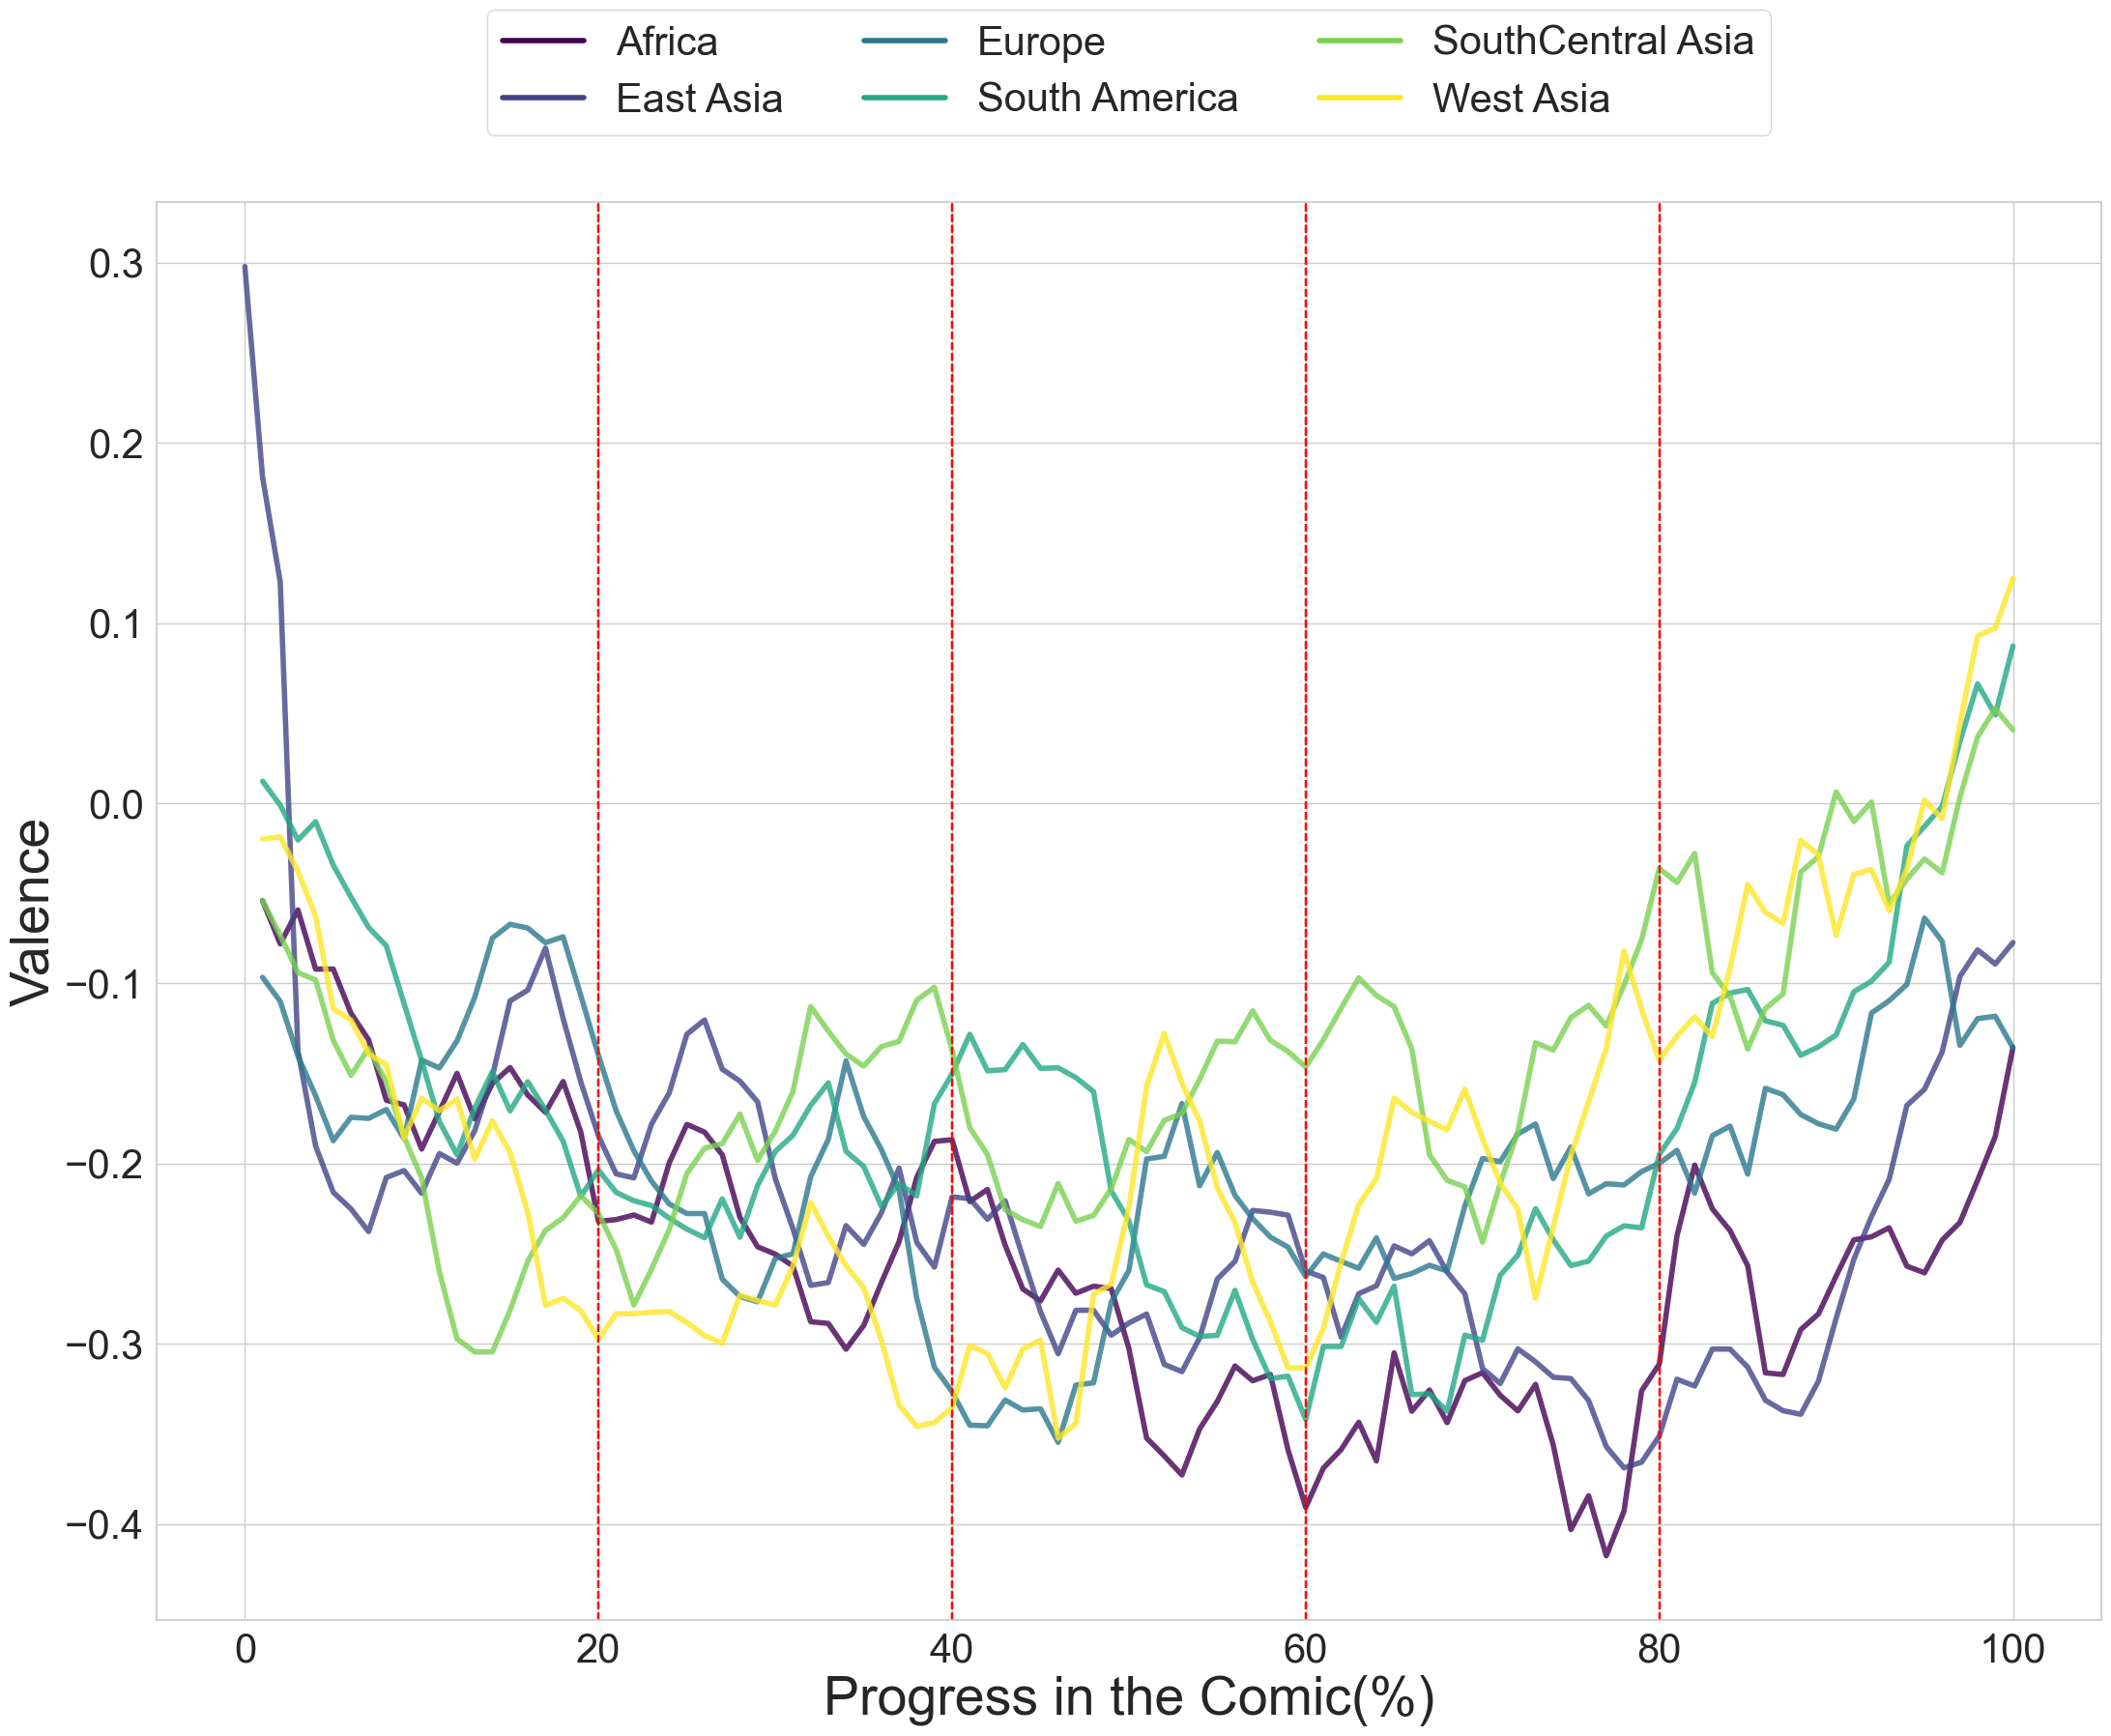

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Set plot style
sns.set(style="whitegrid")

# Use a colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
colors = [cmap(i / 5) for i in range(6)]
region_colors = {
    'Africa': colors[0],
    'East Asia': colors[1],
    'Europe': colors[2],
    'South America': colors[3],
    'SouthCentral Asia': colors[4],
    'West Asia': colors[5]
}

def calculate_metrics(data, value_col, index_col, window):
    mean_valence_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_valence_by_panel['Valence_SMA'] = mean_valence_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    mean_valence_by_panel[index_col] = mean_valence_by_panel[index_col] * 100
    return mean_valence_by_panel

# Define the rolling window size
window = 5

# Create plot
fig, ax2 = plt.subplots(figsize=(22, 18))

print("Mean Calculated from SMA Values for Valence")

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_valence_by_panel = calculate_metrics(region_data, 'Valence#', 'OrdinalPanel%Rounded2', window)
    
    # Plot SMA line
    ax2.plot(mean_valence_by_panel['OrdinalPanel%Rounded2'], mean_valence_by_panel['Valence_SMA'], color=color, linewidth=4, label=f'{region} SMA (window={window})', alpha=0.8)

    # Calculate and add dashed lines to split data into 5 segments
    num_segments = 5
    segment_indices = np.array_split(mean_valence_by_panel.index, num_segments)
    segment_points = [mean_valence_by_panel['OrdinalPanel%Rounded2'].iloc[segment[-1]] for segment in segment_indices]

    for sp in segment_points[:-1]: 
        ax2.axvline(x=sp, color='red', linestyle='--')

# Set up legend in the upper center
legend_lines = [Line2D([0], [0], color=color, linewidth=4) for color in region_colors.values()]
legend_labels = [f'{region}' for region in region_colors.keys()]

ax2.legend(legend_lines, legend_labels, loc='upper center', fontsize=30, frameon=True, bbox_to_anchor=(0.5, 1.15), ncol=3)

ax2.set_title('', fontsize=40)
ax2.set_xlabel('Progress in the Comic(%)', fontsize=40)
ax2.set_ylabel('Valence', fontsize=40)

ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

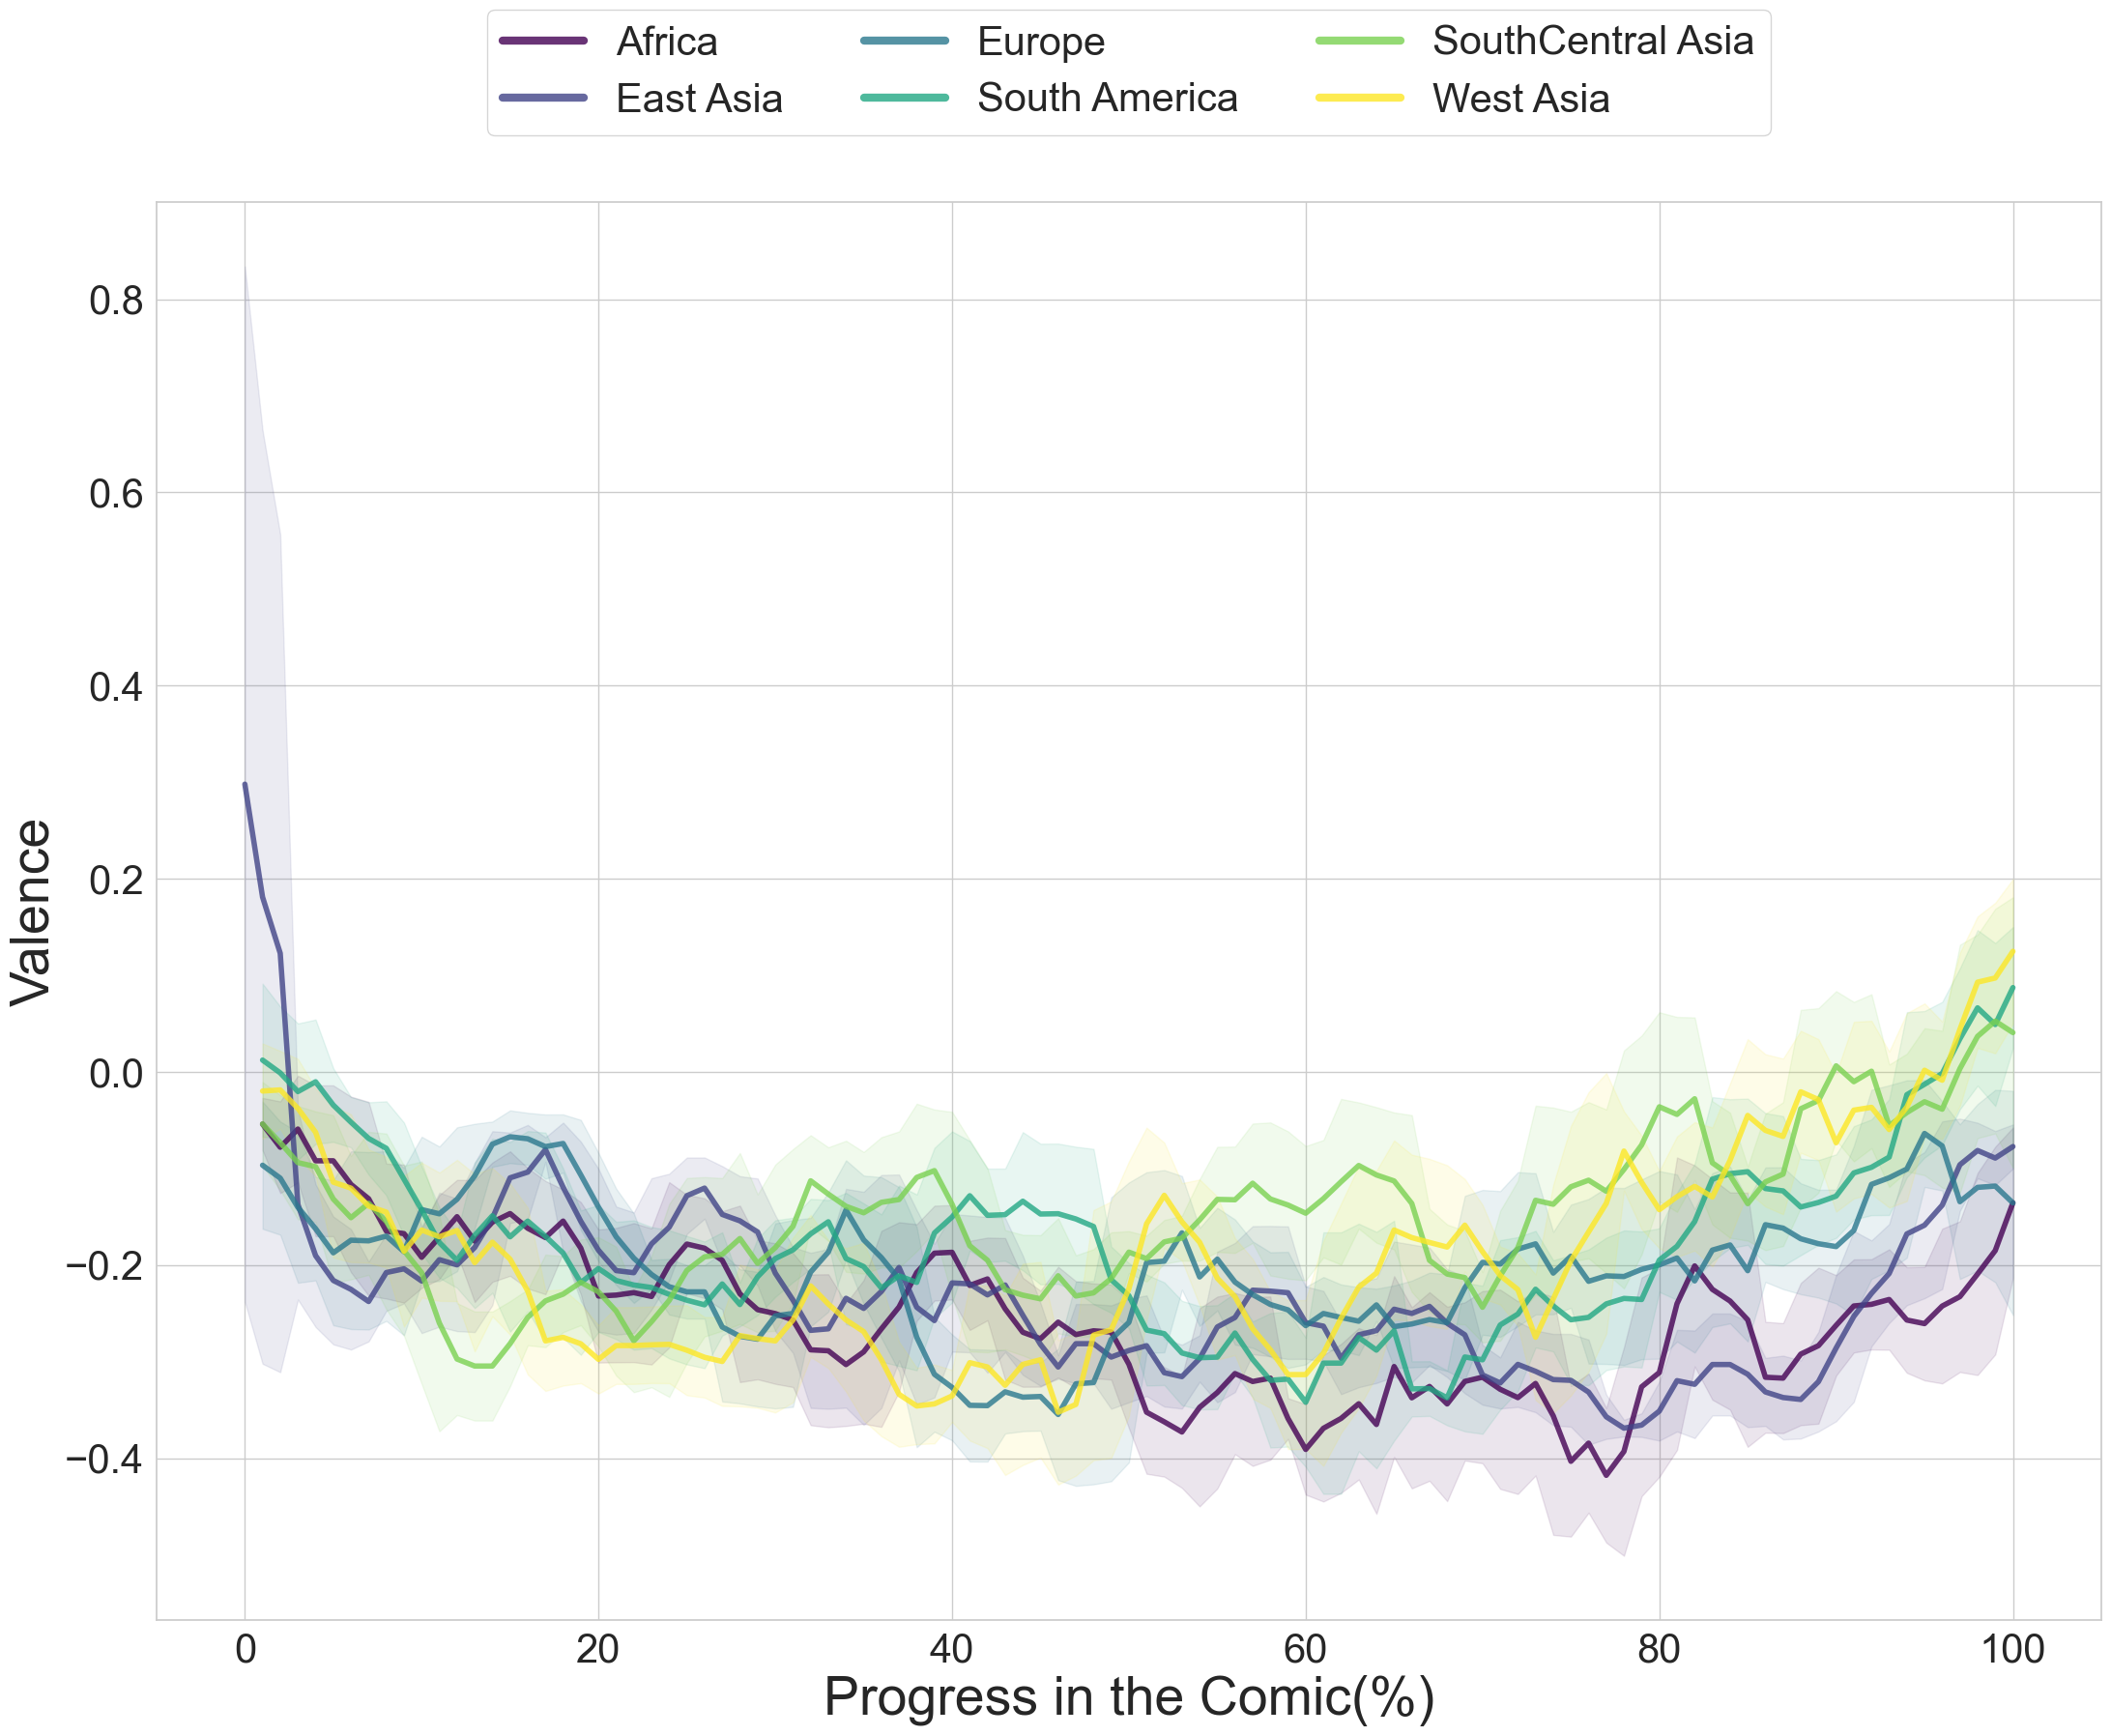

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from matplotlib.lines import Line2D

# Set plot style
sns.set(style="whitegrid")

# Define colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
region_names = ['Africa', 'East Asia', 'Europe', 'South America', 'SouthCentral Asia', 'West Asia']
colors = [cmap(i / (len(region_names) - 1)) for i in range(len(region_names))]
region_colors = {region: colors[idx] for idx, region in enumerate(region_names)}

def calculate_metrics(data, value_col, index_col, window):
    mean_valence_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_valence_by_panel['Valence_SMA'] = mean_valence_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    mean_valence_by_panel['Valence_SE'] = mean_valence_by_panel[value_col].rolling(window=window, min_periods=1, center=True).std() / np.sqrt(window)
    mean_valence_by_panel[index_col] = mean_valence_by_panel[index_col] * 100
    return mean_valence_by_panel

# Define the rolling window size
window = 5

# Create the plot for Valence with confidence intervals
fig, ax2 = plt.subplots(figsize=(22, 18))

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_valence_by_panel = calculate_metrics(region_data, 'Valence#', 'OrdinalPanel%Rounded2', window)
    
    # Calculate 97.5% confidence interval
    ci95 = norm.ppf(0.975)
    mean_valence_by_panel['Valence_CI'] = ci95 * mean_valence_by_panel['Valence_SE']

    # Plot SMA line for Valence
    ax2.plot(mean_valence_by_panel['OrdinalPanel%Rounded2'], mean_valence_by_panel['Valence_SMA'], color=color, linewidth=4, label=f'{region}', alpha=0.8)
    
    # Plot confidence interval for Valence
    ax2.fill_between(mean_valence_by_panel['OrdinalPanel%Rounded2'], 
                     mean_valence_by_panel['Valence_SMA'] - mean_valence_by_panel['Valence_CI'], 
                     mean_valence_by_panel['Valence_SMA'] + mean_valence_by_panel['Valence_CI'], 
                     color=color, alpha=0.1)

ax2.set_title('', fontsize=40)
ax2.set_xlabel('Progress in the Comic(%)', fontsize=40)
ax2.set_ylabel('Valence', fontsize=40)

# Configure legend to be at the upper center
legend = ax2.legend(loc='upper center', fontsize=30, frameon=True, bbox_to_anchor=(0.5, 1.15), ncol=3)
for line in legend.get_lines():
    line.set_linewidth(6)

ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

In [42]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Store ANOVA results for each region
anova_results_valence = {}

# Function to perform ANOVA and post-hoc test
def perform_anova_and_posthoc(data, value_col, index_col, num_segments):
    # Split data into num_segments segments based on index_col
    segment_indices = np.array_split(data[index_col].unique(), num_segments)
    
    # Collect data for each segment
    segment_data = []
    for segment in segment_indices:
        segment_values = data[data[index_col].isin(segment)][value_col]
        segment_data.append(segment_values)
    
    # Perform ANOVA test
    f_stat, p_value = f_oneway(*segment_data)
    print(f'ANOVA results for {region}: F-statistic = {f_stat}, p-value = {p_value}')
    
    # Check for significance
    if p_value < 0.05:
        print(f'Post-hoc test for {region} (p-value < 0.05):')
        # Combine data and labels for post-hoc
        combined_data = pd.DataFrame({value_col: data[value_col], index_col: pd.cut(data[index_col], bins=num_segments, labels=range(num_segments))})
        posthoc = pairwise_tukeyhsd(endog=combined_data[value_col], groups=combined_data[index_col], alpha=0.05)
        print(posthoc.summary())

        # Store ANOVA and post-hoc results
        anova_results_valence[region] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': posthoc}
    else:
        print(f'No significant differences found for {region} (p-value >= 0.05).')
        anova_results_valence[region] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': None}

# Perform ANOVA and post-hoc test for each region on Valence#
for region in region_colors.keys():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_valence_by_panel = calculate_metrics(region_data, 'Valence#', 'OrdinalPanel%Rounded2', window)
    
    # Perform ANOVA and post-hoc test
    perform_anova_and_posthoc(mean_valence_by_panel, 'Valence_SMA', 'OrdinalPanel%Rounded2', num_segments=5)

# Output ANOVA results for Valence#
print("ANOVA Results Summary for Valence#:")
for region, results in anova_results_valence.items():
    print(f"{region} - F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")
    if results['posthoc']:
        print(results['posthoc'].summary())

ANOVA results for Africa: F-statistic = 65.93906094409778, p-value = 1.393974606125531e-26
Post-hoc test for Africa (p-value < 0.05):
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0922    0.0 -0.1299 -0.0545   True
     0      2  -0.1608    0.0 -0.1985 -0.1231   True
     0      3  -0.2058    0.0 -0.2435 -0.1681   True
     0      4  -0.1012    0.0 -0.1389 -0.0635   True
     1      2  -0.0686    0.0 -0.1063 -0.0309   True
     1      3  -0.1137    0.0 -0.1514  -0.076   True
     1      4   -0.009 0.9632 -0.0467  0.0287  False
     2      3   -0.045 0.0109 -0.0827 -0.0073   True
     2      4   0.0596 0.0003  0.0219  0.0973   True
     3      4   0.1046    0.0  0.0669  0.1423   True
----------------------------------------------------
ANOVA results for East Asia: F-statistic = 13.87633518355199, p-value = 5.72329196291032e-09
Post-hoc test for East Asia (p-

In [43]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Store ANOVA results for each segment
anova_results_by_segment_valence = {}

# Function to perform ANOVA and post-hoc test
def perform_anova_and_posthoc_by_segment(data, value_col, region_col, segment_col, segments):
    # Collect data for each region within each segment
    for segment in segments:
        segment_data = data[data[segment_col] == segment]
        
        # Collect Valence values for each region within this segment
        region_data = [segment_data[segment_data[region_col] == region][value_col] for region in segment_data[region_col].unique()]
        
        # Perform ANOVA test if there are at least two groups
        if len(region_data) > 1:
            f_stat, p_value = f_oneway(*region_data)
            print(f'ANOVA results for segment {segment}: F-statistic = {f_stat}, p-value = {p_value}')
            
            # Check for significance
            if p_value < 0.05:
                print(f'Post-hoc test for segment {segment} (p-value < 0.05):')
                # Combine data and labels for post-hoc
                posthoc = pairwise_tukeyhsd(endog=segment_data[value_col], groups=segment_data[region_col], alpha=0.05)
                print(posthoc.summary())

                # Store ANOVA and post-hoc results
                anova_results_by_segment_valence[segment] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': posthoc}
            else:
                print(f'No significant differences found for segment {segment} (p-value >= 0.05).')
                anova_results_by_segment_valence[segment] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': None}
        else:
            print(f'Not enough data for ANOVA in segment {segment}. Skipping...')

df_region_sample['Segment'] = pd.cut(df_region_sample['OrdinalPanel%Rounded2'], bins=5, labels=range(5))

# List of segments
segments = df_region_sample['Segment'].unique()

# Perform ANOVA and post-hoc test for each segment on Valence#
perform_anova_and_posthoc_by_segment(df_region_sample, 'Valence#', 'RegionSimplified', 'Segment', segments)

# Output ANOVA results for Valence#
print("ANOVA Results Summary by Segment for Valence#:")
for segment, results in anova_results_by_segment_valence.items():
    print(f"Segment {segment} - F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")
    if results['posthoc']:
        print(results['posthoc'].summary())

ANOVA results for segment 0: F-statistic = 2.6785600335921393, p-value = 0.020081263051659443
Post-hoc test for segment 0 (p-value < 0.05):
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
           Africa         East Asia  -0.0206 0.9754  -0.099  0.0577  False
           Africa            Europe   0.0158 0.9939 -0.0656  0.0971  False
           Africa     South America   0.0281 0.9193 -0.0522  0.1083  False
           Africa SouthCentral Asia  -0.0566 0.3922 -0.1408  0.0276  False
           Africa         West Asia  -0.0276 0.9427 -0.1135  0.0584  False
        East Asia            Europe   0.0364 0.6834 -0.0342   0.107  False
        East Asia     South America   0.0487 0.3419 -0.0207  0.1181  False
        East Asia SouthCentral Asia   -0.036 0.7347 -0.1099  0.0379  False
        East Asia         West Asia

Mean Calculated from SMA Values


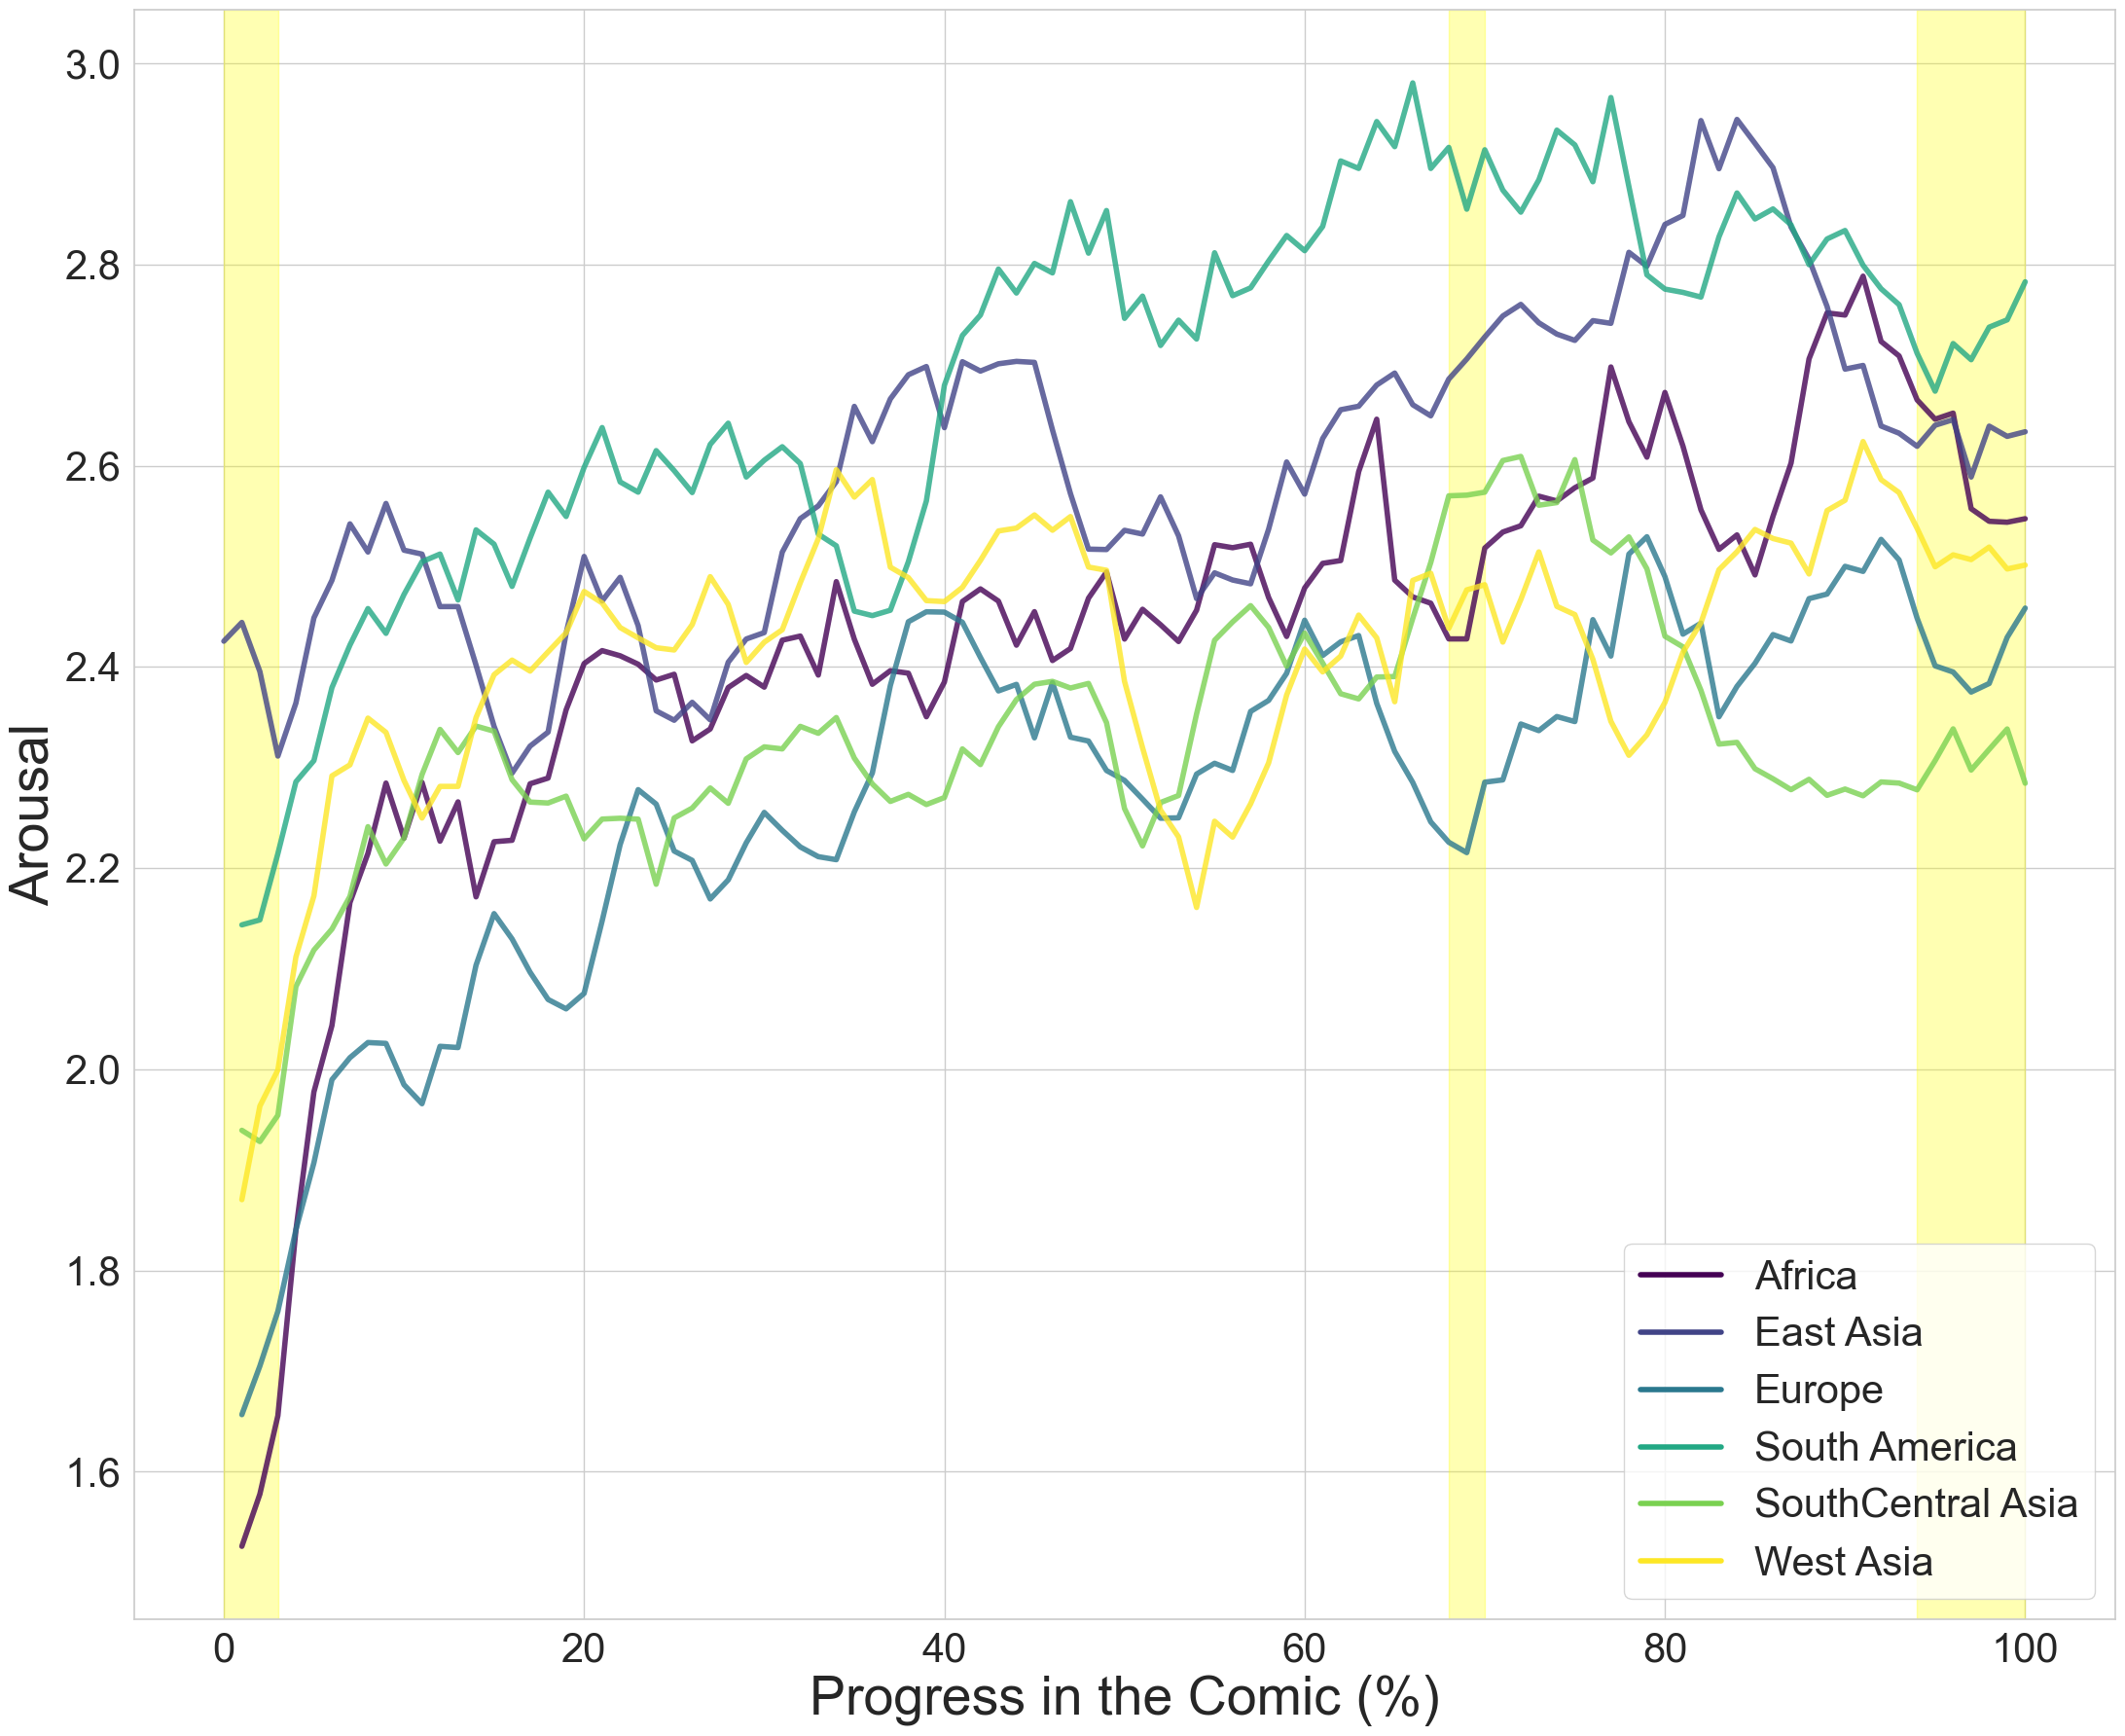

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from matplotlib.lines import Line2D

# Set plot style
sns.set(style="whitegrid")

# Use a colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
colors = [cmap(i / 5) for i in range(6)]
region_colors = {
    'Africa': colors[0],
    'East Asia': colors[1],
    'Europe': colors[2],
    'South America': colors[3],
    'SouthCentral Asia': colors[4],
    'West Asia': colors[5]
}

def calculate_metrics(data, value_col, index_col, window):
    mean_arousal_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_arousal_by_panel['Arousal_SMA'] = mean_arousal_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    
    # 归一化 X 轴的数值到 0-100
    mean_arousal_by_panel[index_col] = mean_arousal_by_panel[index_col] * 100
    
    return mean_arousal_by_panel

# Define the rolling window size
window = 5

# Create plot
fig, ax2 = plt.subplots(figsize=(22, 18))

print("Mean Calculated from SMA Values")

# 调整 highlight_regions 以匹配 0-100 的 X 轴范围
highlight_regions = [(0.0 * 100, 0.03 * 100), (0.68 * 100, 0.70 * 100), (0.94 * 100, 1.0 * 100)]
highlight_regions = [(0, 3), (68, 70), (94, 100)]  # 直接写出转换后的数值

for start, end in highlight_regions:
    ax2.axvspan(start, end, color='yellow', alpha=0.3)

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_arousal_by_panel = calculate_metrics(region_data, 'Arousal', 'OrdinalPanel%Rounded2', window)
    
    # Plot SMA line
    ax2.plot(mean_arousal_by_panel['OrdinalPanel%Rounded2'], mean_arousal_by_panel['Arousal_SMA'], 
             color=color, linewidth=4, label=f'{region} SMA (window={window})', alpha=0.8)

# Set up legend
legend_lines = [Line2D([0], [0], color=color, linewidth=4) for color in region_colors.values()]
legend_labels = [f'{region}' for region in region_colors.keys()]

ax2.legend(legend_lines, legend_labels, loc='lower right', fontsize=30, frameon=True)

ax2.set_title('', fontsize=40)
ax2.set_xlabel('Progress in the Comic (%)', fontsize=40)  # 确保单位正确
ax2.set_ylabel('Arousal', fontsize=40)

ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

Mean Calculated from SMA Values for Valence


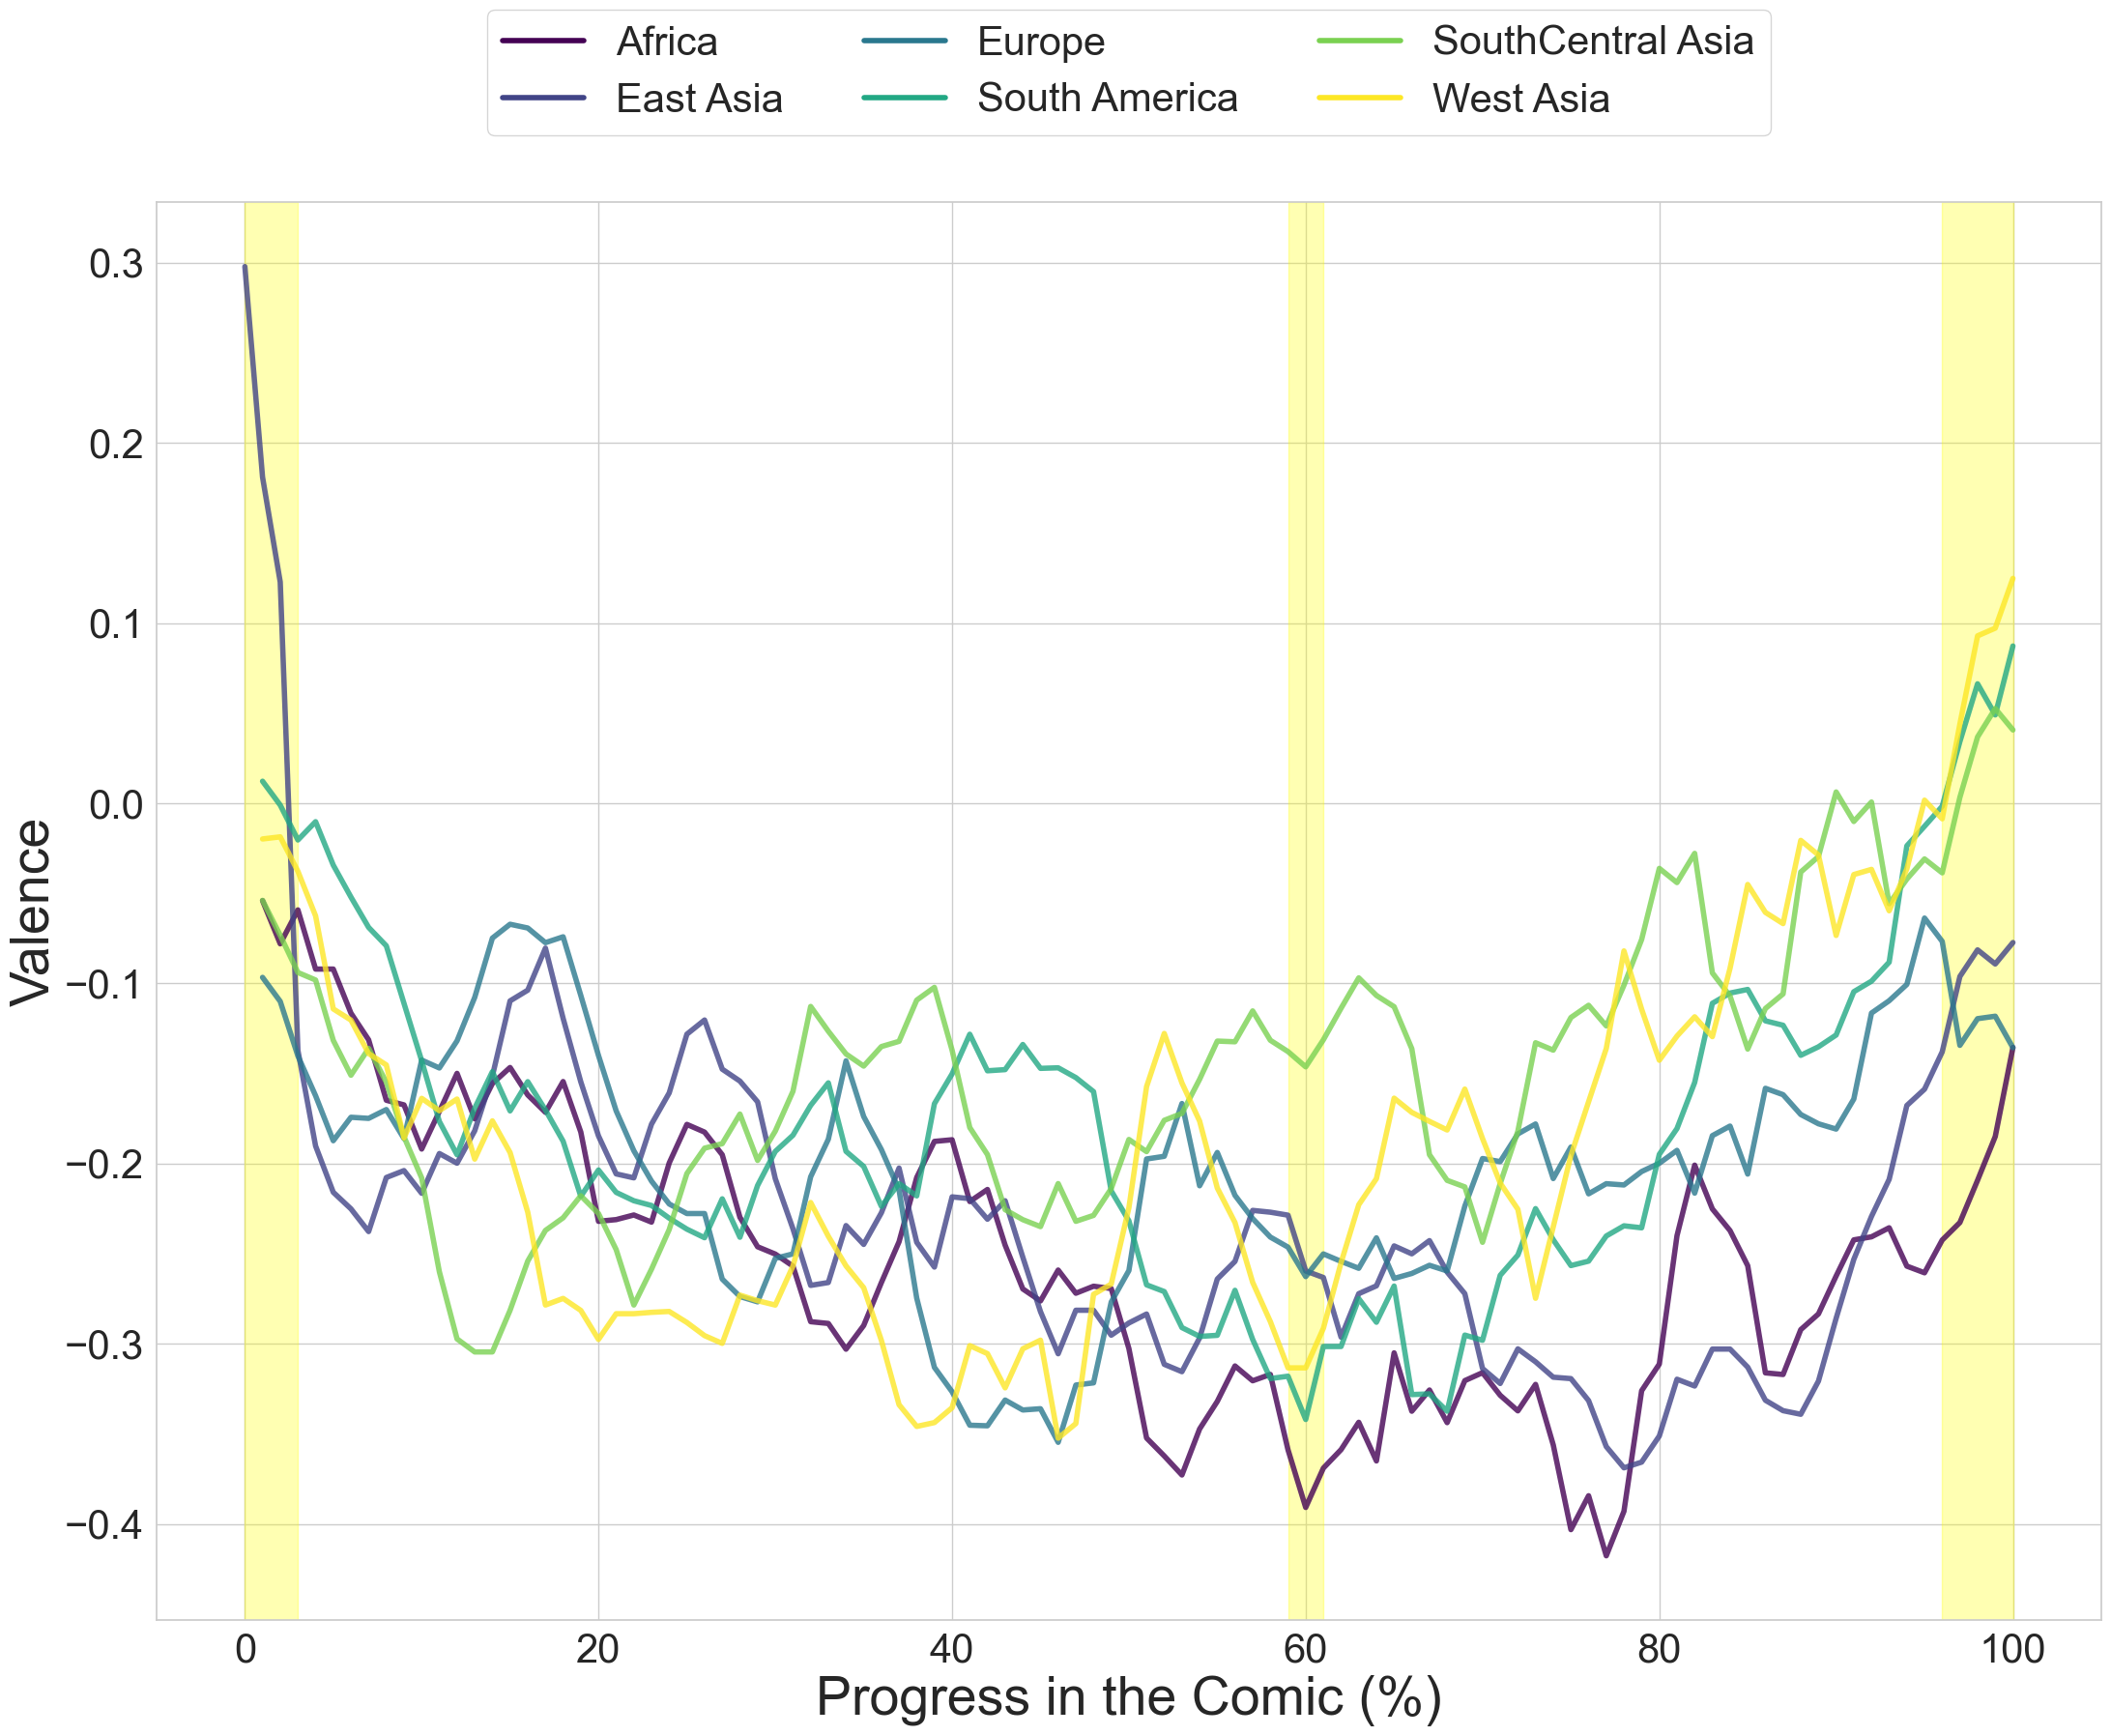

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Set plot style
sns.set(style="whitegrid")

# Use a colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
colors = [cmap(i / 5) for i in range(6)]
region_colors = {
    'Africa': colors[0],
    'East Asia': colors[1],
    'Europe': colors[2],
    'South America': colors[3],
    'SouthCentral Asia': colors[4],
    'West Asia': colors[5]
}

def calculate_metrics(data, value_col, index_col, window):
    mean_valence_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_valence_by_panel['Valence_SMA'] = mean_valence_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    mean_valence_by_panel[index_col] = mean_valence_by_panel[index_col] * 100
    return mean_valence_by_panel

# Define the rolling window size
window = 5

# Create plot
fig, ax2 = plt.subplots(figsize=(22, 18))

print("Mean Calculated from SMA Values for Valence")

# Highlight specific regions
highlight_regions = [(0, 3), (59, 61), (96, 100)]  # Narrower middle region width
for start, end in highlight_regions:
    ax2.axvspan(start, end, color='yellow', alpha=0.3)

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_valence_by_panel = calculate_metrics(region_data, 'Valence#', 'OrdinalPanel%Rounded2', window)
    
    # Plot SMA line
    ax2.plot(mean_valence_by_panel['OrdinalPanel%Rounded2'], mean_valence_by_panel['Valence_SMA'], color=color, linewidth=4, label=f'{region} SMA (window={window})', alpha=0.8)

# Set up legend
legend_lines = [Line2D([0], [0], color=color, linewidth=4) for color in region_colors.values()]
legend_labels = [f'{region}' for region in region_colors.keys()]

# Position the legend at the upper center
ax2.legend(legend_lines, legend_labels, loc='upper center', fontsize=30, frameon=True, bbox_to_anchor=(0.5, 1.15), ncol=3)

ax2.set_title('', fontsize=40)
ax2.set_xlabel('Progress in the Comic (%)', fontsize=40)
ax2.set_ylabel('Valence', fontsize=40)

ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

In [46]:
panel_count = df_region_sample[df_region_sample['Document Name'] == 'A Deal With Lucifer'].shape[0]

print(panel_count)

155


In [47]:
panel_count = df_region_sample[df_region_sample['Document Name'] == 'Fair Friendship'].shape[0]

print(panel_count)

41


In [48]:
panel_count = df_region_sample[df_region_sample['Document Name'] == 'My Friend'].shape[0]

print(panel_count)

135
